# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite
DEBUG = False

def Bayes1a(X_train, Y_train, X_test):

    #get mu_plus and mu_minus
    n,d = X_train.shape
    m,d = X_test.shape
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    mu_plus = np.mean(X_train_pos.T,axis=1)
    mu_minus = np.mean(X_train_neg.T,axis=1)
    assert(mu_plus.shape[0]==d and mu_minus.shape[0]==d)
    
    #taking identity matrix as variance
    numerator = np.exp(-0.5*np.linalg.norm(X_test-mu_plus, axis=1))
    denominator = np.exp(-0.5*np.linalg.norm(X_test-mu_plus, axis=1)) + np.exp(-0.5*np.linalg.norm(X_test-mu_minus, axis=1))
    probab = numerator/denominator
    assert(probab.shape==(m,))
    
    #debug
    if DEBUG:
        print('bayes1a')
        print(mu_plus, mu_minus)
    
    #final result
    Y_pred = np.sign((2*probab)-1)    
    return Y_pred
    
def Bayes1b(X_train, Y_train, X_test):

    #get mean
    n,d = X_train.shape
    m,d = X_test.shape
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    mu_plus = np.mean(X_train_pos.T,axis=1)
    mu_minus = np.mean(X_train_neg.T,axis=1)
    assert(mu_plus.shape==(d,) and mu_minus.shape==(d,))
    
    #get variance
    X_train_normalized = np.concatenate([X_train_pos-mu_plus, X_train_neg-mu_minus], axis=0)
    sigma = np.cov(X_train_normalized.T)
    assert(sigma.shape==(d,d))
    
    #intermediate variables
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    diff_plus = (X_test-mu_plus).T
    diff_minus = (X_test-mu_minus).T
    assert(diff_plus.shape==(d,m) and diff_minus.shape==(d,m))
    product_plus = np.mean(np.multiply(np.matmul(diff_plus.T,inv_sigma).T, diff_plus), axis=0).T
    product_minus = np.mean(np.multiply(np.matmul(diff_minus.T,inv_sigma).T, diff_minus), axis=0).T
    assert(product_plus.shape==(m,) and product_minus.shape==(m,))
    
    #calculate probabilities
    numerator = (1/(np.sqrt(det_sigma)*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product_plus))
    denominator = numerator + ((1/(np.sqrt(det_sigma)*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product_minus)))
    probab = numerator/denominator
    assert(probab.shape==(m,))
    
    #debug
    if DEBUG:
        print('bayes1b')
        print(mu_plus, mu_minus)
        print(sigma)
    
    #final result
    Y_pred = np.sign((2*probab)-1)
    return Y_pred

def Bayes1c(X_train, Y_train, X_test):
    
    #get mean
    n,d = X_train.shape
    m,d = X_test.shape
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    mu_plus = np.mean(X_train_pos.T,axis=1)
    mu_minus = np.mean(X_train_neg.T,axis=1)
    assert(mu_plus.shape==(d,) and mu_minus.shape==(d,))
    
    #get variance
    sigma_plus = np.cov(X_train_pos.T)
    sigma_minus = np.cov(X_train_neg.T)
    assert(sigma_plus.shape==(d,d) and sigma_minus.shape==(d,d))
    
    #intermediate variables
    det_sigma_plus = np.linalg.det(sigma_plus)
    det_sigma_minus = np.linalg.det(sigma_minus)
    inv_sigma_plus = np.linalg.inv(sigma_plus)
    inv_sigma_minus = np.linalg.inv(sigma_minus)
    diff_plus = (X_test-mu_plus).T
    diff_minus = (X_test-mu_minus).T
    product_plus = np.mean(np.multiply(np.matmul(diff_plus.T,inv_sigma_plus).T, diff_plus), axis=0).T
    product_minus = np.mean(np.multiply(np.matmul(diff_minus.T,inv_sigma_minus).T, diff_minus), axis=0).T
    assert(diff_plus.shape==(d,m) and diff_minus.shape==(d,m))
    assert(product_plus.shape==(m,) and product_minus.shape==(m,))
    
    #calculate probabilities
    numerator = (1/(np.sqrt(det_sigma_plus)*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product_plus))
    denominator = numerator + ((1/(np.sqrt(det_sigma_minus)*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product_minus)))
    probab = numerator/denominator
    assert(probab.shape==(m,))
    
    #debug
    if DEBUG:
        print('bayes1c')
        print(mu_plus, mu_minus)
        print(sigma_plus, sigma_minus)
    
    #final result
    Y_pred = np.sign((2*probab)-1)
    return Y_pred

In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = 3*np.random.randn(1000,3)+np.array([[1.,2.,3.]])
X_train_neg = 0.5*np.random.randn(1000,3)+np.array([[2.,4.,6.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = 3*np.random.randn(1000,3)+np.array([[1.,2.,3.]])
X_test_neg = 0.5*np.random.randn(1000,3)+np.array([[2.,4.,6.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

#print(np.sum(Y_pred_test_1a==Y_test),end=', ')
#print(np.sum(Y_pred_test_1b==Y_test),end=', ')    
#print(np.sum(Y_pred_test_1c==Y_test))

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


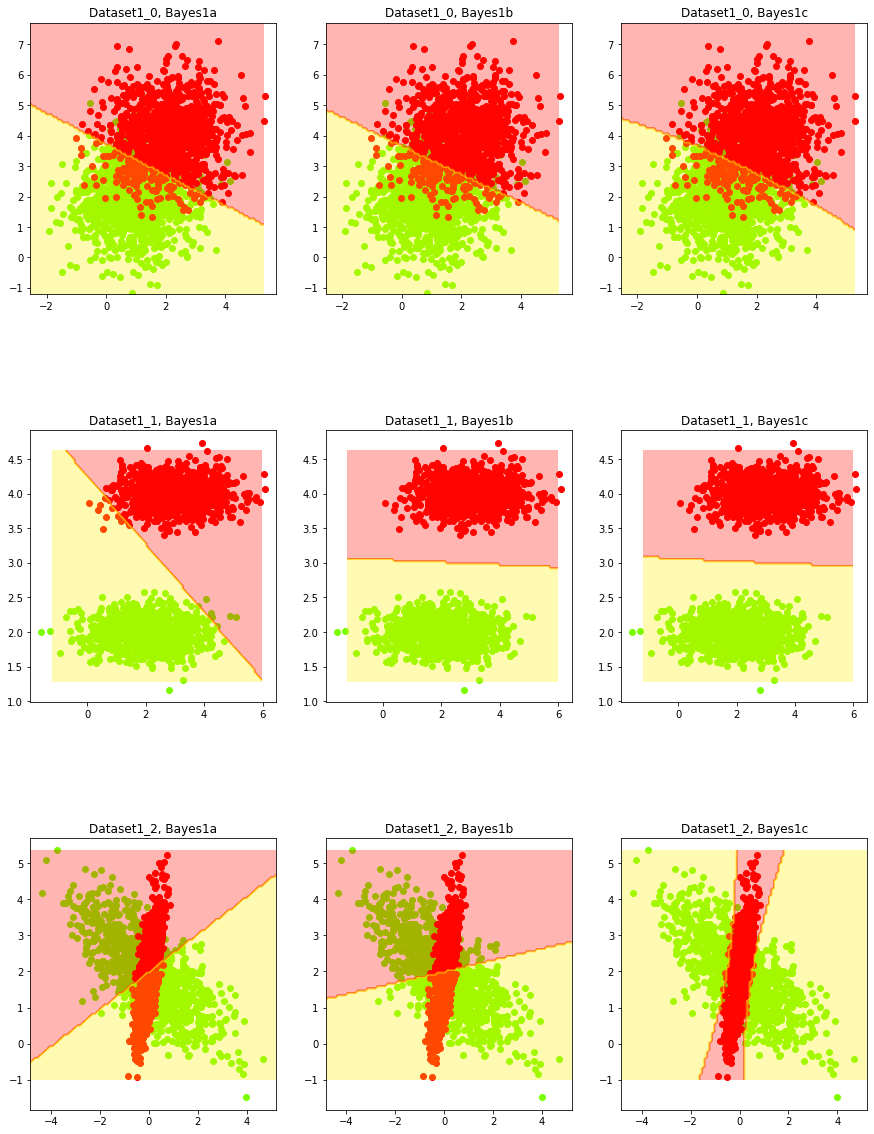

In [4]:
# Cell type : CodeWrite
DIR = '../../Data/'
PATHS = [DIR+'Archive/dataset1_1.npz',DIR+'Archive/dataset1_2.npz',DIR+'Archive/dataset1_3.npz']
PLOT_TRAIN = True
#keep false to plot test only

Y_pred_1a=[];Y_pred_1b=[];Y_pred_1c=[];
X_train=[]; Y_train=[]; X_test=[]; Y_test=[];
errors = np.zeros(shape=(3,len(PATHS)))
for i,path in enumerate(PATHS):  
    with np.load(path) as data:
        X_train.append(data['arr_0'])
        Y_train.append(data['arr_1'])
        X_test.append(data['arr_2'])
        Y_test.append(data['arr_3'])
    Y_pred_1a.append(Bayes1a(X_train[i],Y_train[i],X_test[i]))
    Y_pred_1b.append(Bayes1b(X_train[i],Y_train[i],X_test[i]))
    Y_pred_1c.append(Bayes1c(X_train[i],Y_train[i],X_test[i]))
    assert(Y_pred_1a[i].shape==Y_pred_1b[i].shape==Y_pred_1c[i].shape==Y_test[i].shape)
    errors[i,:] = [np.mean(np.abs(Y_pred_1a[i]!=Y_test[i])),
                   np.mean(np.abs(Y_pred_1b[i]!=Y_test[i])),
                   np.mean(np.abs(Y_pred_1c[i]!=Y_test[i]))]
    
fig, axs = plt.subplots(3,3,figsize=(15,20))
fig.subplots_adjust(hspace = .5)
ltr = {0:'a',1:'b',2:'c'}
bayes_func_list = [Bayes1a, Bayes1b, Bayes1c]
pred_list = [Y_pred_1a, Y_pred_1b, Y_pred_1c]
for i in range(len(PATHS)):
    for j in range(3):
        Y_pred = pred_list[j][i]
        
        #axs[i,j].scatter(X_test[i][Y_pred==1][:,0], X_test[i][Y_pred==1][:,1], c='lawngreen')
        #axs[i,j].scatter(X_test[i][Y_pred==-1][:,0], X_test[i][Y_pred==-1][:,1], c='red')
        if PLOT_TRAIN:
            axs[i,j].scatter(X_train[i][Y_train[i]==1][:,0], X_train[i][Y_train[i]==1][:,1], c='lawngreen')
            axs[i,j].scatter(X_train[i][Y_train[i]==-1][:,0], X_train[i][Y_train[i]==-1][:,1], c='red')
        
        min_x1, max_x1 = np.min(X_test[i][:,0]), np.max(X_test[i][:,0])
        min_x2, max_x2 = np.min(X_test[i][:,1]), np.max(X_test[i][:,1])
        x1_dummy, x2_dummy = np.linspace(min_x1, max_x1, 100), np.linspace(min_x2, max_x2, 100)
        x1_dummy_grid, x2_dummy_grid = np.meshgrid(x1_dummy, x2_dummy)
        X_dummy_test = np.c_[x1_dummy_grid.ravel(), x2_dummy_grid.ravel()]
        dummy_pred = bayes_func_list[j](X_train[i],Y_train[i],X_dummy_test).reshape(100,100)
        axs[i,j].contourf(x1_dummy_grid, x2_dummy_grid, dummy_pred, alpha=0.3, cmap='autumn')
        axs[i,j].set_title(f'Dataset1_{i}, Bayes1{ltr[j]}')
        
fig.show()

** Cell type : TextWrite ** 

### Test Set Error

|           | Bayes1a | Bayes1b | Bayes1c |
|----------:|:--------:|:--------:|:--------:|
| Dataset1 | 0.1260 | 0.1245 | 0.1255 |
| Dataset2 | 0.0085 | 0.0000 | 0.0000 |
| Dataset3 | 0.4970 | 0.4950 | 0.1525 |

### Assuptions
* We are assuming all X/Y and Y/X comes from normal distribution. 
* The percentage of samples with Y=1 is taken as the prior probability of P(y=1). This is just an assumption as the samples we have may not fully represent the distribution we are taking.

### Observations
* The first dataset can be easily represented with two means and same covariance matrix even the identity matrix works fine.  
* The first and the second dataset has similar shapes with only centre point different. So we just need two different means to represent both distributions.
* In the third we can see the shape for y=1 distribution is different from shape=-1 distribution. Thus having 2 mean and same covariance matrix may not be enough to represent the whole dataset. This is evident from the plots itself. Thus bayes1c performs much better on the 3rd dataset.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell
DEBUG = False

def Bayes2a(X_train, Y_train, X_test):

    loss_matrix = [[0,1,2,3],
                  [1,0,1,2],
                  [2,1,0,1],
                  [3,2,1,0]]
    # split to classes
    n, d = X_train.shape
    m, d = X_test.shape
    classes = [1,2,3,4]
    X_train_split = []
    for i in classes:
        X_train_split.append(X_train[Y_train==i,:])
    
    # get mean
    mu = []
    for i in classes:
        mu.append(np.mean(X_train_split[i-1], axis=0))
        assert(mu[i-1].shape==(d,))
    
    # get prior
    prior = []
    for i in classes:
        prior.append(len(X_train_split[i-1])/len(X_train))
    
    # get covariance matrix
    sigma = np.identity(d)
    assert(sigma.shape==(d,d))
    
    # intermediates
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    diff = []; product = []; numerator = [];
    for i in classes:
        diff.append((X_test-mu[i-1]).T)
        product.append(np.mean(np.multiply(np.matmul(diff[i-1].T,inv_sigma).T, diff[i-1]), axis=0).T)
        assert(diff[i-1].shape==(d,m))
        assert(product[i-1].shape==(m,))
        numerator.append((1/(np.sqrt(det_sigma)*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product[i-1])))
    numerator_full = np.stack(numerator, axis=0).T
    assert(numerator_full.shape==(m, len(classes)))
    risk = np.dot(numerator_full, loss_matrix)
    Y_pred = np.argmin(risk, axis=1)+1
    assert(Y_pred.shape==(m,))
    
    if DEBUG:
        print(mu)
        print(sigma)
    
    return Y_pred
    
def Bayes2b(X_train, Y_train, X_test):

    loss_matrix = [[0,1,2,3],
                  [1,0,1,2],
                  [2,1,0,1],
                  [3,2,1,0]]
    # split to classes
    n, d = X_train.shape
    m, d = X_test.shape
    classes = [1,2,3,4]
    X_train_split = []
    for i in classes:
        X_train_split.append(X_train[Y_train==i,:])
    
    # get mean
    mu = []
    for i in classes:
        mu.append(np.mean(X_train_split[i-1], axis=0))
        assert(mu[i-1].shape==(d,))
    
    # get prior
    prior = []
    for i in classes:
        prior.append(len(X_train_split[i-1])/len(X_train))
    
    # get covariance matrix
    X_train_new = []
    for i in classes:
        X_train_new.append(X_train_split[i-1]-mu[i-1])
    X_train_normalized = np.concatenate(X_train_new)
    assert(X_train_normalized.shape==X_train.shape)
    sigma = np.cov(X_train_normalized.T)
    assert(sigma.shape==(d,d))
    
    # intermediates
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    diff = []; product = []; numerator = [];
    for i in classes:
        diff.append((X_test-mu[i-1]).T)
        product.append(np.mean(np.multiply(np.matmul(diff[i-1].T,inv_sigma).T, diff[i-1]), axis=0).T)
        assert(diff[i-1].shape==(d,m))
        assert(product[i-1].shape==(m,))
        numerator.append((1/(np.sqrt(det_sigma)*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product[i-1])))
    numerator_full = np.stack(numerator, axis=0).T
    assert(numerator_full.shape==(m, len(classes)))
    risk = np.dot(numerator_full, loss_matrix)
    Y_pred = np.argmin(risk, axis=1)+1
    assert(Y_pred.shape==(m,))
    
    if DEBUG:
        print(mu)
        print(sigma)
    
    return Y_pred

def Bayes2c(X_train, Y_train, X_test):

    loss_matrix = [[0,1,2,3],
                  [1,0,1,2],
                  [2,1,0,1],
                  [3,2,1,0]]
    # split to classes
    n, d = X_train.shape
    m, d = X_test.shape
    classes = [1,2,3,4]
    X_train_split = []
    for i in classes:
        X_train_split.append(X_train[Y_train==i,:])
    
    # get mean
    mu = []
    for i in classes:
        mu.append(np.mean(X_train_split[i-1], axis=0))
        assert(mu[i-1].shape==(d,))
    
    # get prior
    prior = []
    for i in classes:
        prior.append(len(X_train_split[i-1])/len(X_train))
    
    # get covariance matrix
    sigma = []
    for i in classes:
        sigma.append(np.cov(X_train_split[i-1].T))
        assert(sigma[i-1].shape==(d,d))
    
    # intermediates
    det_sigma = []; inv_sigma = [];
    diff = []; product = []; numerator = [];
    for i in classes:
        det_sigma.append(np.linalg.det(sigma[i-1]))
        inv_sigma.append(np.linalg.inv(sigma[i-1]))
        diff.append((X_test-mu[i-1]).T)
        product.append(np.mean(np.multiply(np.matmul(diff[i-1].T,inv_sigma[i-1]).T, diff[i-1]), axis=0).T)
        assert(diff[i-1].shape==(d,m))
        assert(product[i-1].shape==(m,))
        numerator.append((1/(np.sqrt(det_sigma[i-1])*np.power(2*np.pi,d/2))) * (np.exp(-0.5*product[i-1])))
    numerator_full = np.stack(numerator, axis=0).T
    assert(numerator_full.shape==(m, len(classes)))
    risk = np.dot(numerator_full, loss_matrix)
    Y_pred = np.argmin(risk, axis=1)+1
    assert(Y_pred.shape==(m,))
    
    if DEBUG:
        print(mu)
        print(sigma)
    
    return Y_pred

In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[2.,0.],[0.,0.5]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[0.2,0.],[0.,2.]])
mat4=np.array([[3.,0.],[0.,0.5]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

# print(np.sum(Y_pred_test_2a==Y_test)/len(Y_test))
# print(np.sum(Y_pred_test_2b==Y_test)/len(Y_test))
# print(np.sum(Y_pred_test_2c==Y_test)/len(Y_test))

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


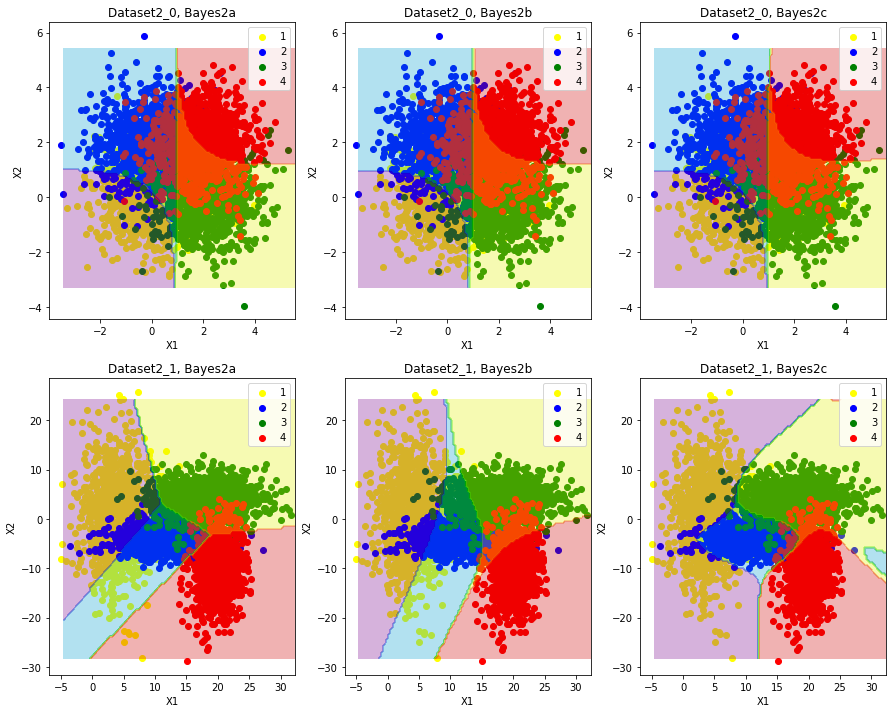

In [7]:
# Cell type : CodeWrite
DIR = '../../Data/'
PATHS = [DIR+'Archive/dataset2_1.npz',DIR+'Archive/dataset2_2.npz']
PLOT_TRAIN = True
#keep false to plot test only

Y_pred_2a=[];Y_pred_2b=[];Y_pred_2c=[];
X_train=[]; Y_train=[]; X_test=[]; Y_test=[];
errors = np.zeros(shape=(len(PATHS),3))
accuracy = np.zeros(shape=(len(PATHS),3))

for i,path in enumerate(PATHS):  
    with np.load(path) as data:
        X_train.append(data['arr_0'])
        Y_train.append(data['arr_1'])
        X_test.append(data['arr_2'])
        Y_test.append(data['arr_3'])
    Y_pred_2a.append(Bayes2a(X_train[i],Y_train[i],X_test[i]))
    Y_pred_2b.append(Bayes2b(X_train[i],Y_train[i],X_test[i]))
    Y_pred_2c.append(Bayes2c(X_train[i],Y_train[i],X_test[i]))
    assert(Y_pred_2a[i].shape==Y_pred_2b[i].shape==Y_pred_2c[i].shape==Y_test[i].shape)
    
    errors[i,:] = [np.mean(np.abs(Y_pred_2a[i]!=Y_test[i])),
                   np.mean(np.abs(Y_pred_2b[i]!=Y_test[i])),
                   np.mean(np.abs(Y_pred_2c[i]!=Y_test[i]))]
    accuracy[i,:] = [np.sum(Y_pred_2a[i]==Y_test[i])/Y_test[i].shape[0],
                     np.sum(Y_pred_2b[i]==Y_test[i])/Y_test[i].shape[0],
                     np.sum(Y_pred_2c[i]==Y_test[i])/Y_test[i].shape[0]]
    
fig, axs = plt.subplots(len(PATHS),3,figsize=(15,12))
fig.subplots_adjust(hspace = 0.2)
ltr_map = {0:'a',1:'b',2:'c'}
classes = [1,2,3,4]
bayes_func_list2 = [Bayes2a, Bayes2b, Bayes2c]
colours = {1:'yellow',2:'blue',3:'green',4:'red'}
pred_list = [Y_pred_2a, Y_pred_2b, Y_pred_2c]
for i in range(len(PATHS)):
    for j in range(3):
        Y_pred = pred_list[j]
        for kk in classes:
            #axs[i,j].scatter(X_test[i][Y_pred[i]==kk][:,0], X_test[i][Y_pred[i]==kk][:,1], c=colours[kk])
            if PLOT_TRAIN:
                axs[i,j].scatter(X_train[i][Y_train[i]==kk][:,0], X_train[i][Y_train[i]==kk][:,1], c=colours[kk], label=kk)
        
        min_x1, max_x1 = np.min(X_test[i][:,0]), np.max(X_test[i][:,0])
        min_x2, max_x2 = np.min(X_test[i][:,1]), np.max(X_test[i][:,1])
        x1_dummy, x2_dummy = np.linspace(min_x1, max_x1, 100), np.linspace(min_x2, max_x2, 100)
        x1_dummy_grid, x2_dummy_grid = np.meshgrid(x1_dummy, x2_dummy)
        X_dummy_test = np.c_[x1_dummy_grid.ravel(), x2_dummy_grid.ravel()]
        dummy_pred = bayes_func_list2[j](X_train[i],Y_train[i],X_dummy_test).reshape(100,100)
        axs[i,j].contourf(x1_dummy_grid, x2_dummy_grid, dummy_pred, alpha=0.3, cmap='nipy_spectral')
        
        axs[i,j].set_title(f'Dataset2_{i}, Bayes2{ltr_map[j]}')
        axs[i,j].set_xlabel(f'X1')
        axs[i,j].set_ylabel(f'X2')
        axs[i,j].legend()
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### Error matrix
|            | Bayes2_a | Bayes2_b | Bayes2_c |
|------------|----------|----------|----------|
| Dataset2_0 | 0.35775  | 0.35775   | 0.3565   |
| Dataset2_1 | 0.146    | 0.19425  | 0.1305   |


### Accuracy matrix
|            | Bayes2_a | Bayes2_b | Bayes2_c |
|------------|----------|----------|----------|
| Dataset2_0 | 64.22    | 64.225    | 64.35    |
| Dataset2_1 | 85.40    | 80.575   | 86.95    |

### Observations
* All of Bayes2_a, Bayes2_b and Bayes2_c gives almost same error and variance. So identity covariance is a good way to represent this distribution and learning 4 different covariance matrix is not helping much.
* There is only a slight increase when using 4 different covariance matrices.

### Confusion matrix

Dataset2_0, Bayes2_a

|            |1| 2 | 3 | 4|
|------------|------------|----------|----------|----------|
|**1**|460| 391| 145 |  4|
|**2**|42 |797| 113 | 48|
|**3**|38|  96 |820|  46|
|**4**| 4 |150| 354 |492|

Dataset2_0, Bayes2_b

|            |1| 2 | 3 | 4|
|------------|------------|----------|----------|----------|
|**1**|456| 393| 147 |  4|
|**2**|41 |800| 112 | 47|
|**3**|36|  96 |823|  45|
|**4**| 3 |153| 354 |490|

Dataset2_0, Bayes2_c

|            |1| 2 | 3 | 4|
|------------|------------|----------|----------|----------|
|**1**|456| 387| 153 |  4|
|**2**|41 |796| 114 | 49|
|**3**|37|  91 |827|  45|
|**4**| 3 |143| 359 |495|

Dataset2_1, Bayes2_a

|            |1| 2 | 3 | 4|
|------------|------------|----------|----------|----------|
|**1**|830| 150| 18 |  2|
|**2**|93 |784| 46 | 77|
|**3**|30|  62 |904|  4|
|**4**| 0 |23| 79 |898|

Dataset2_1, Bayes2_b

|            |1| 2 | 3 | 4|
|------------|------------|----------|----------|----------|
|**1**|864| 134| 2 |  0|
|**2**|100 |649| 220 | 31|
|**3**|16|  120 |861|  3|
|**4**| 0 |1| 150 |849|

Dataset2_1, Bayes2_c

|            |1| 2 | 3 | 4|
|------------|------------|----------|----------|----------|
|**1**|790| 187| 23 |  0|
|**2**|22 |861| 71 | 46|
|**3**|15|  35 |946|  4|
|**4**| 0 |32| 87 |881|

### Observations
* For Dataset2_0, a lot of 1 is misclassified as 2 and 3. Some 2 is mis classified as 3 and some 3 is misclassified as 2. A lot of 4 is misclassified as 2 and 3. This is evident from the plots where only 1 and 4 are the classes that do not share boundary and thus are not misclassified against each other.
* For dataset2_1, many 1s are misclassified as 2, some 2s are misclassified as 3, some 3s are misclassified as 2 and some 4s are misclassified as 3. From the graph we can see that 1 and 4 shares no boundary and hence not much misclassification happens.


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 432x288 with 0 Axes>

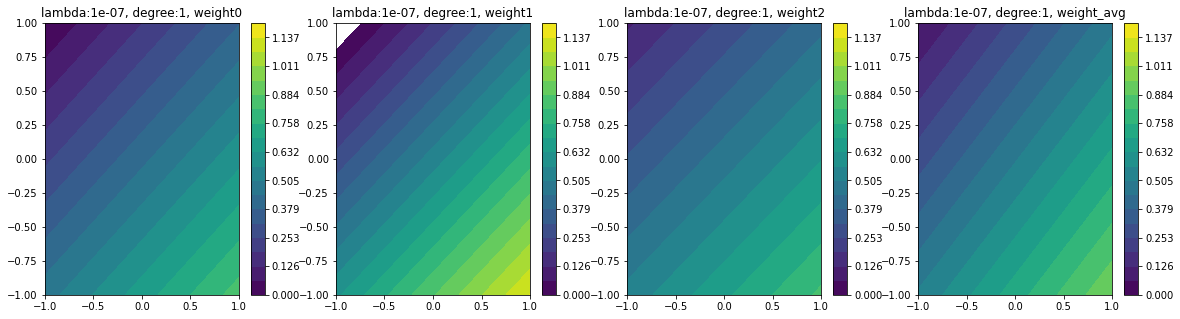

Degree= 1 lambda= 1e-07
Bias = 0.2348704301600809
Variance = 0.0035538446000611358
MSE = 0.05871796356364258


<Figure size 432x288 with 0 Axes>

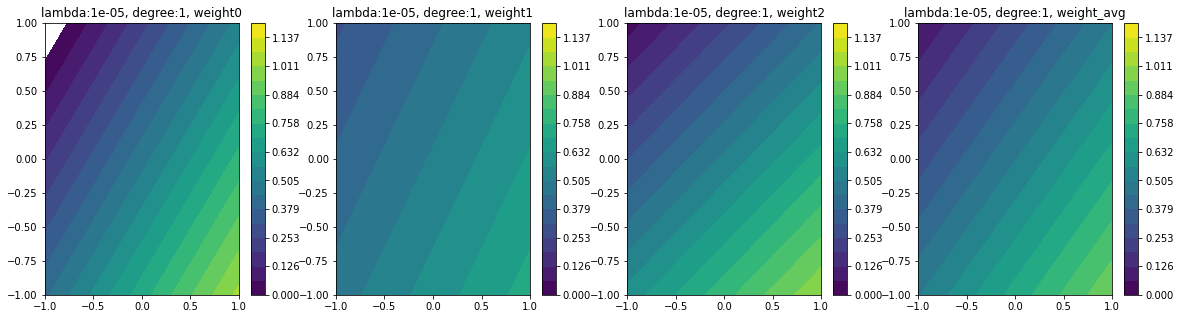

Degree= 1 lambda= 1e-05
Bias = 0.2348146034044163
Variance = 0.003722871508927656
MSE = 0.058860769480900965


<Figure size 432x288 with 0 Axes>

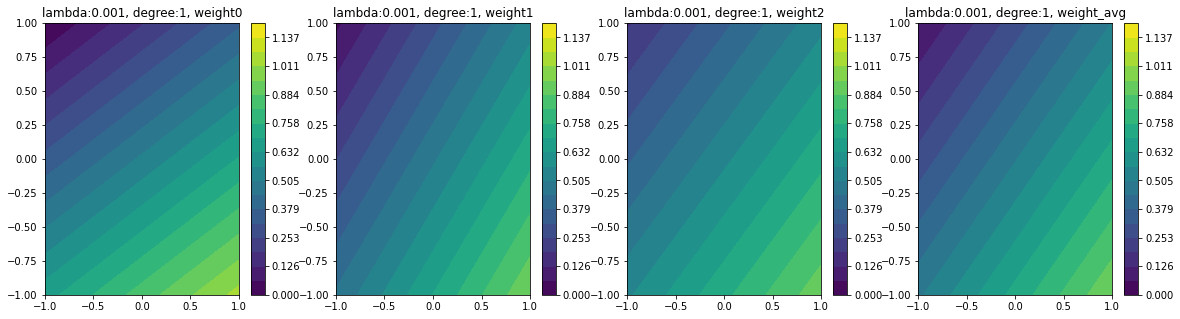

Degree= 1 lambda= 0.001
Bias = 0.23481770127187954
Variance = 0.0037435545087490425
MSE = 0.05888290733935869


<Figure size 432x288 with 0 Axes>

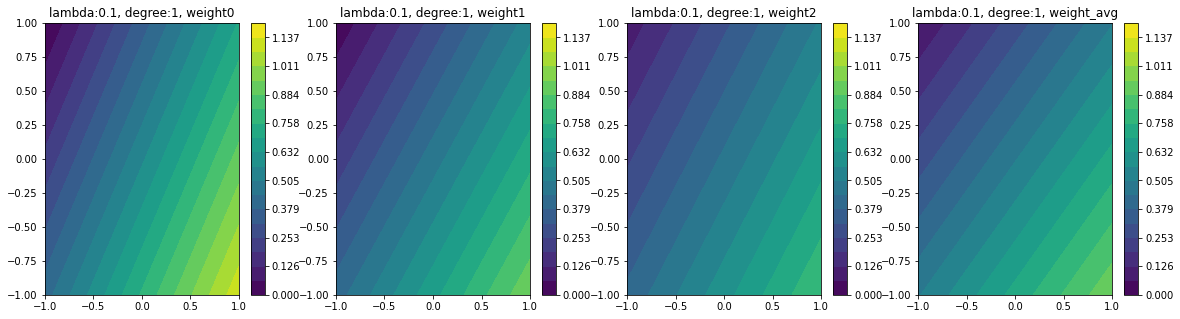

Degree= 1 lambda= 0.1
Bias = 0.23478403276005708
Variance = 0.0037415842828322403
MSE = 0.0588651263219078


<Figure size 432x288 with 0 Axes>

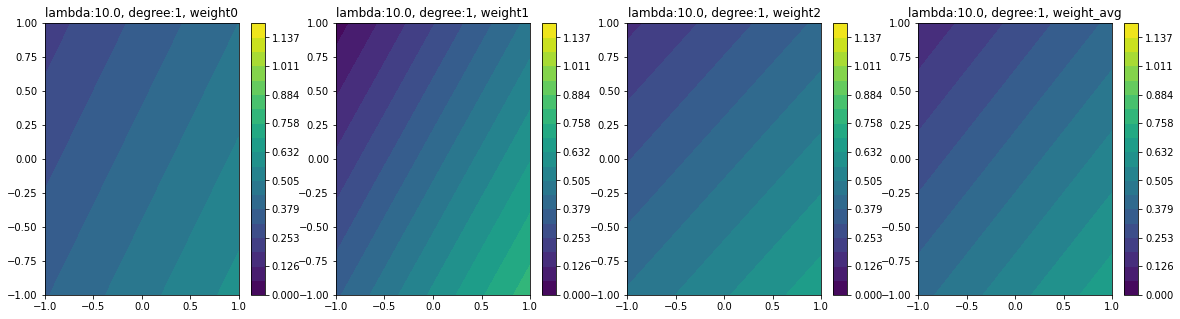

Degree= 1 lambda= 10.0
Bias = 0.259676783697156
Variance = 0.001807237944750856
MSE = 0.0692392699360504


<Figure size 432x288 with 0 Axes>

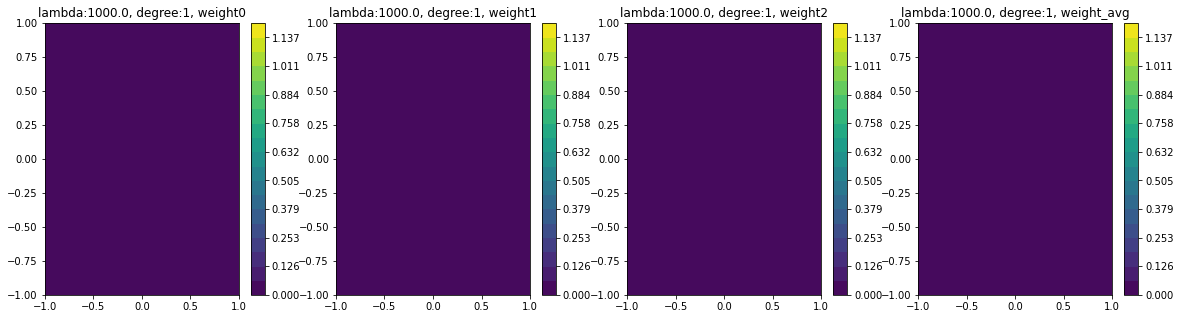

Degree= 1 lambda= 1000.0
Bias = 0.5547463394596707
Variance = 5.852945402312114e-06
MSE = 0.3077493540893064


<Figure size 432x288 with 0 Axes>

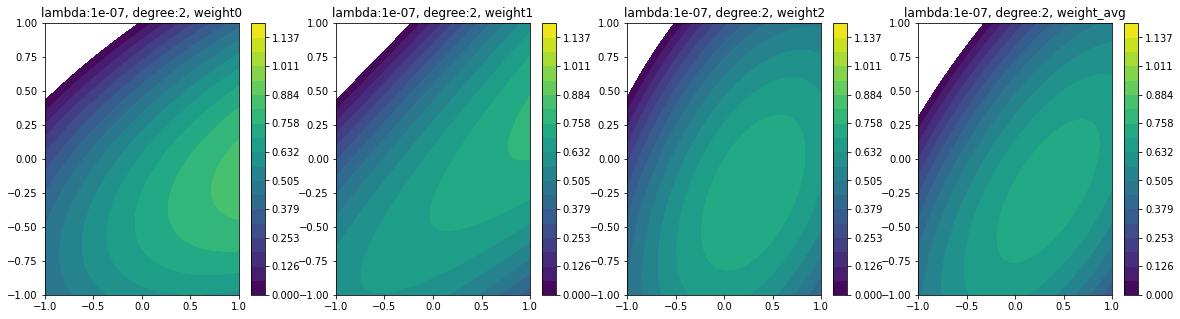

Degree= 2 lambda= 1e-07
Bias = 0.1865131297258037
Variance = 0.00569200698550012
MSE = 0.04047915454561459


<Figure size 432x288 with 0 Axes>

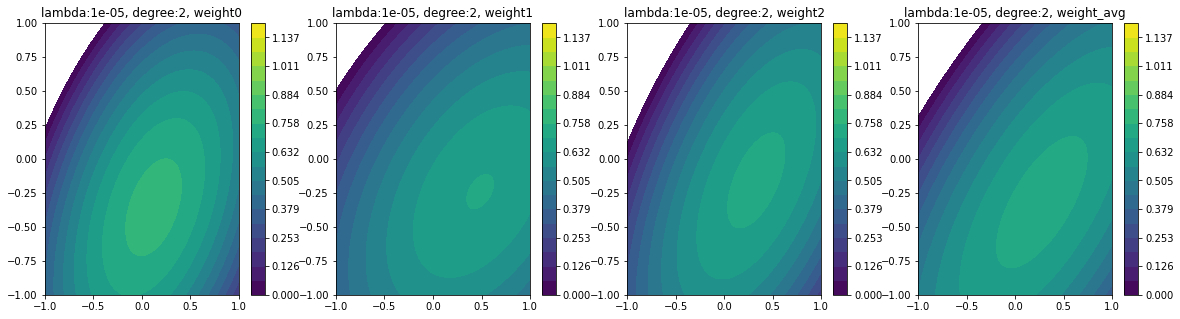

Degree= 2 lambda= 1e-05
Bias = 0.1862838474331888
Variance = 0.005743025037534393
MSE = 0.04044469685204595


<Figure size 432x288 with 0 Axes>

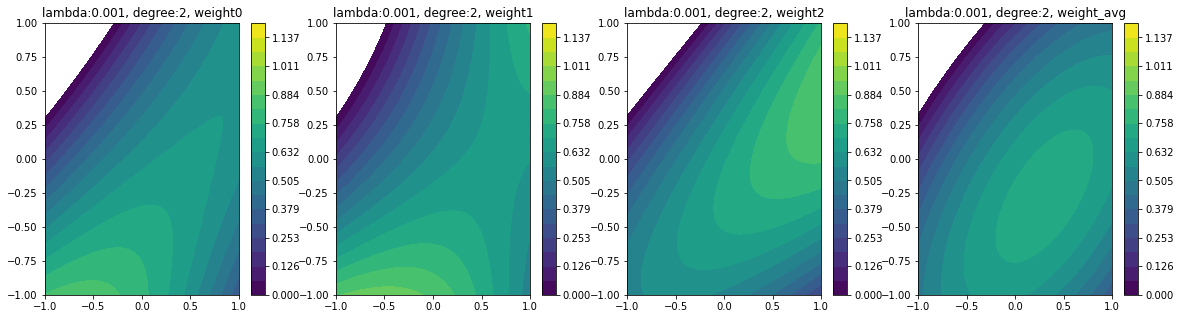

Degree= 2 lambda= 0.001
Bias = 0.18600542159594333
Variance = 0.005922506604376601
MSE = 0.04052052346746122


<Figure size 432x288 with 0 Axes>

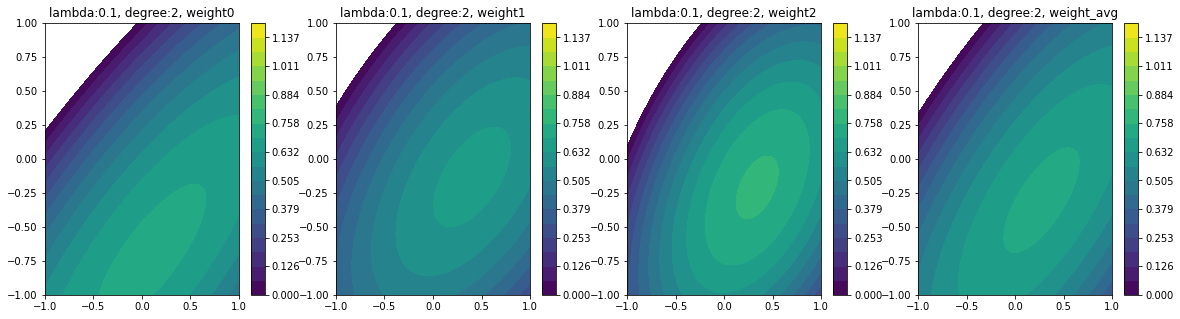

Degree= 2 lambda= 0.1
Bias = 0.1862652595646095
Variance = 0.005658705165894685
MSE = 0.04035345208656604


<Figure size 432x288 with 0 Axes>

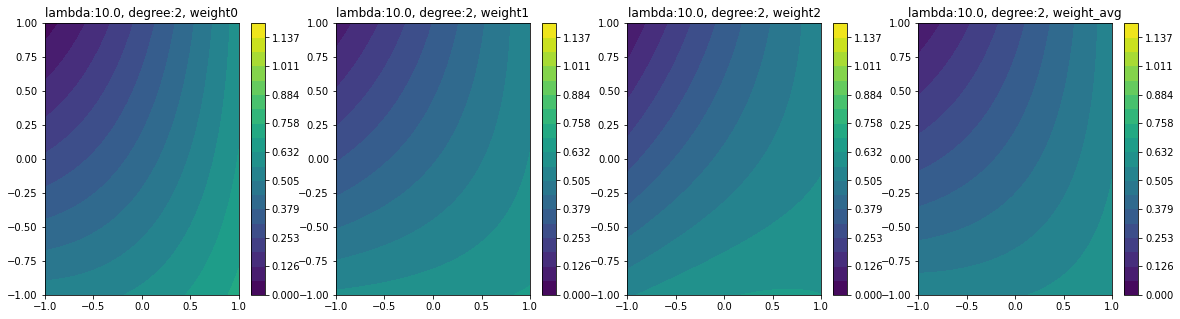

Degree= 2 lambda= 10.0
Bias = 0.2484799921578375
Variance = 0.0015265197957249124
MSE = 0.06326882629848389


<Figure size 432x288 with 0 Axes>

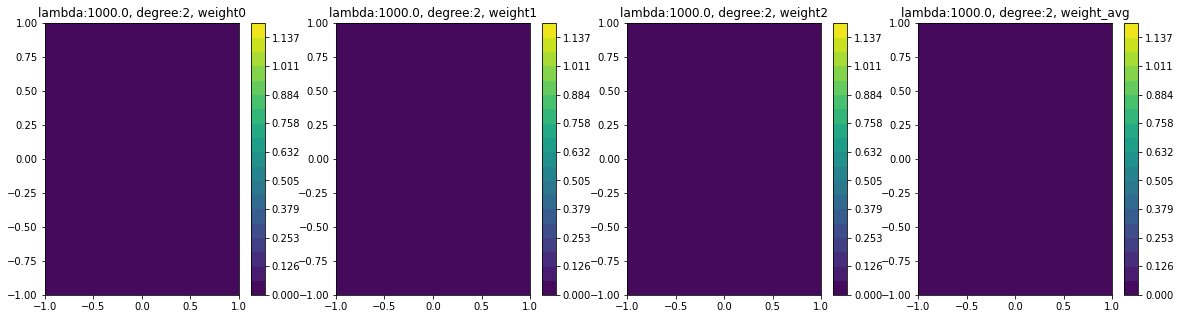

Degree= 2 lambda= 1000.0
Bias = 0.5514747242208934
Variance = 7.82419417507669e-06
MSE = 0.30413219564868543


<Figure size 432x288 with 0 Axes>

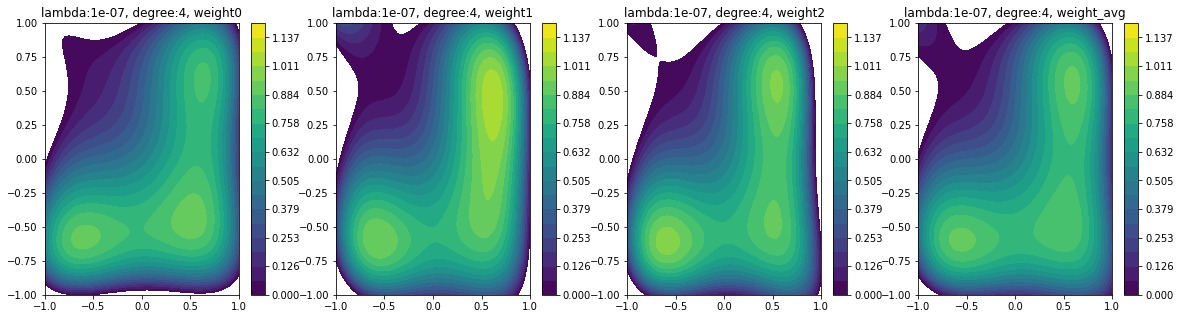

Degree= 4 lambda= 1e-07
Bias = 0.0859995271337883
Variance = 0.006733020280359394
MSE = 0.014128938947594583


<Figure size 432x288 with 0 Axes>

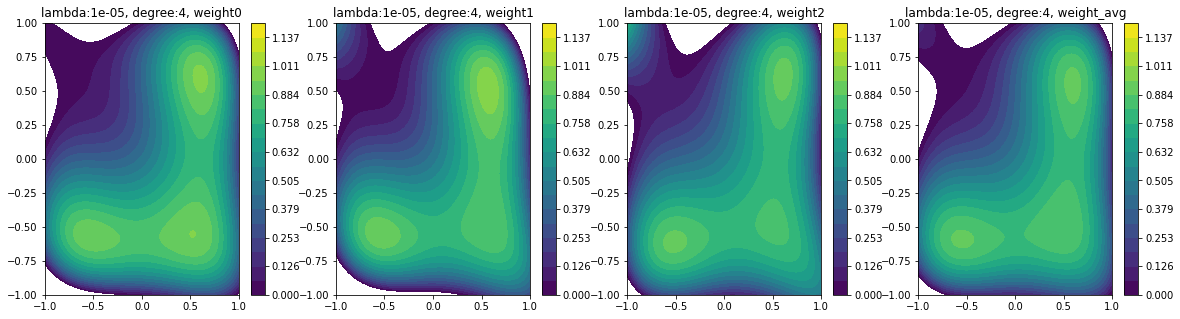

Degree= 4 lambda= 1e-05
Bias = 0.08698141584935967
Variance = 0.008065612645791507
MSE = 0.015631379348950744


<Figure size 432x288 with 0 Axes>

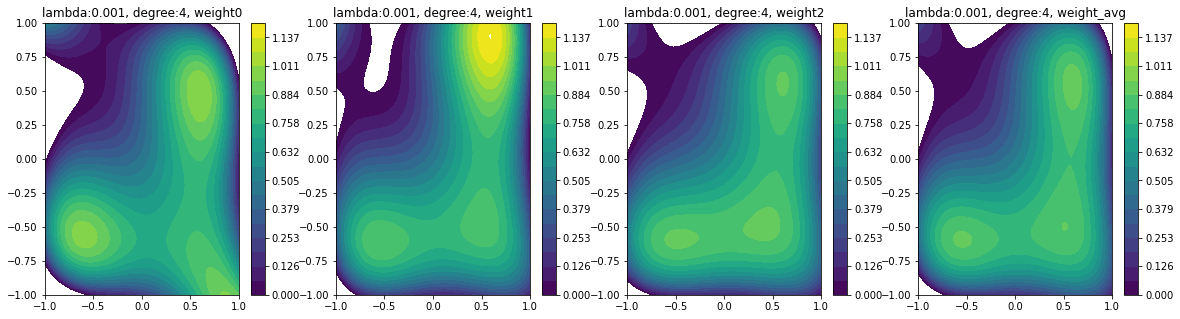

Degree= 4 lambda= 0.001
Bias = 0.0883603348557341
Variance = 0.007820510987037059
MSE = 0.015628059762854515


<Figure size 432x288 with 0 Axes>

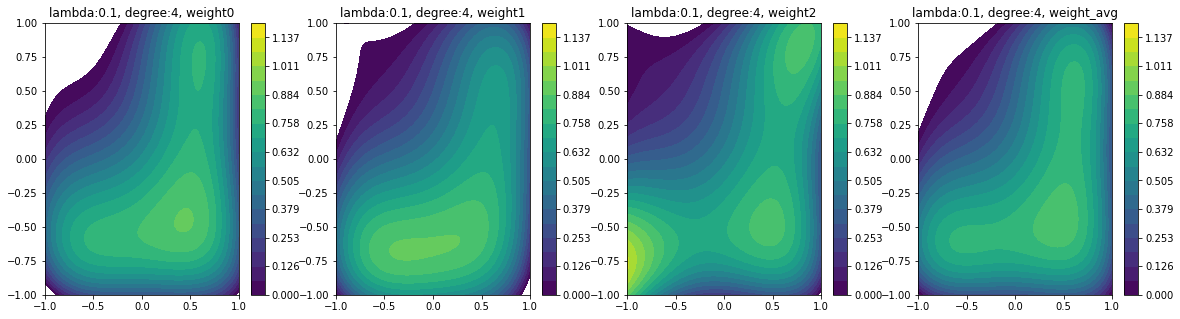

Degree= 4 lambda= 0.1
Bias = 0.09475621094490239
Variance = 0.003951091073207865
MSE = 0.012929830585842704


<Figure size 432x288 with 0 Axes>

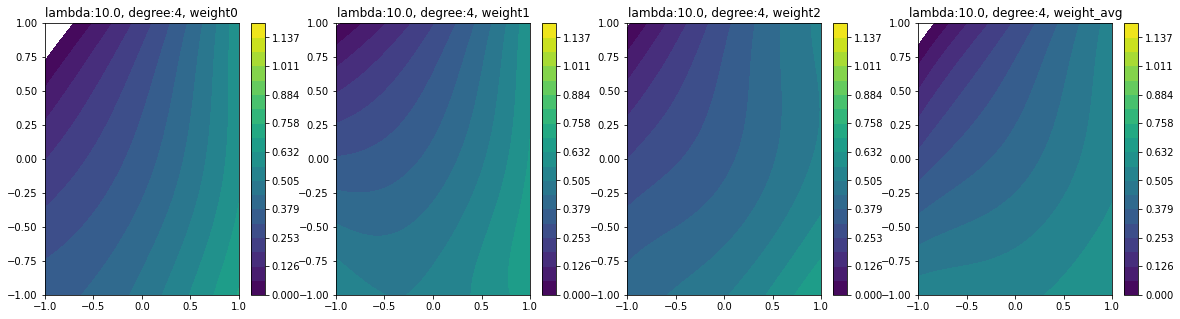

Degree= 4 lambda= 10.0
Bias = 0.2446078677246229
Variance = 0.002302399822592976
MSE = 0.06213540877537959


<Figure size 432x288 with 0 Axes>

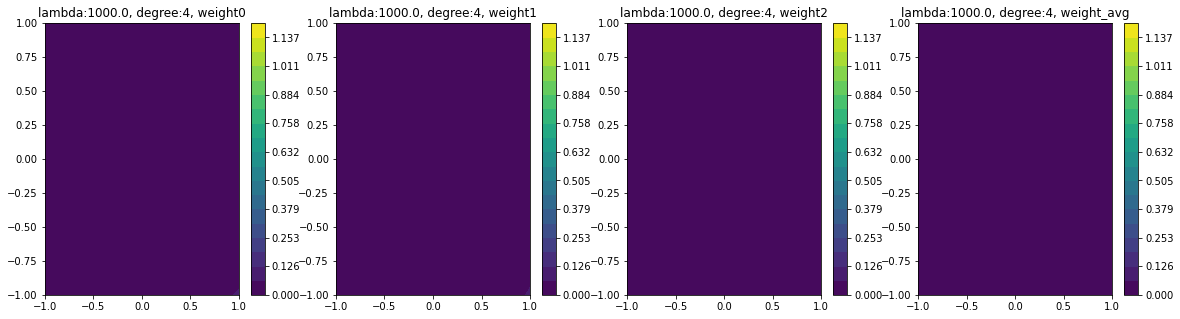

Degree= 4 lambda= 1000.0
Bias = 0.5499080735685844
Variance = 1.329969610195675e-05
MSE = 0.30241218907201356


<Figure size 432x288 with 0 Axes>

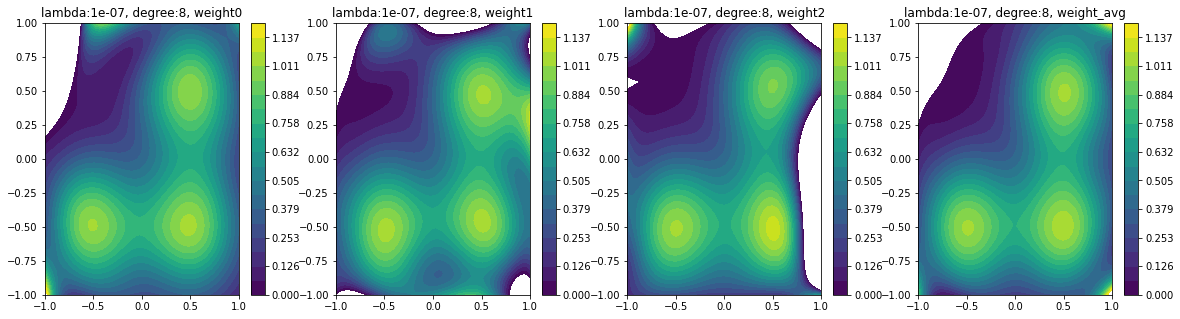

Degree= 8 lambda= 1e-07
Bias = 0.13774759946365864
Variance = 0.22205252086310148
MSE = 0.241026922021102


<Figure size 432x288 with 0 Axes>

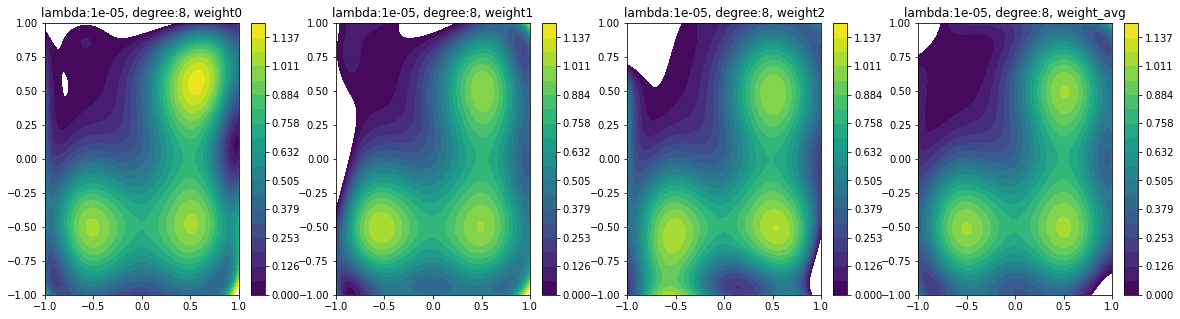

Degree= 8 lambda= 1e-05
Bias = 0.05177066081214102
Variance = 0.04157231691381303
MSE = 0.04425251823473878


<Figure size 432x288 with 0 Axes>

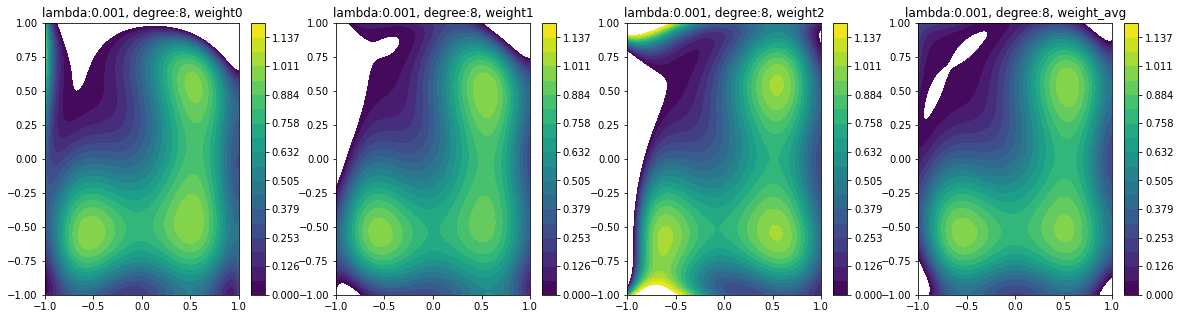

Degree= 8 lambda= 0.001
Bias = 0.07013536778667183
Variance = 0.02023439452831443
MSE = 0.025153364342886154


<Figure size 432x288 with 0 Axes>

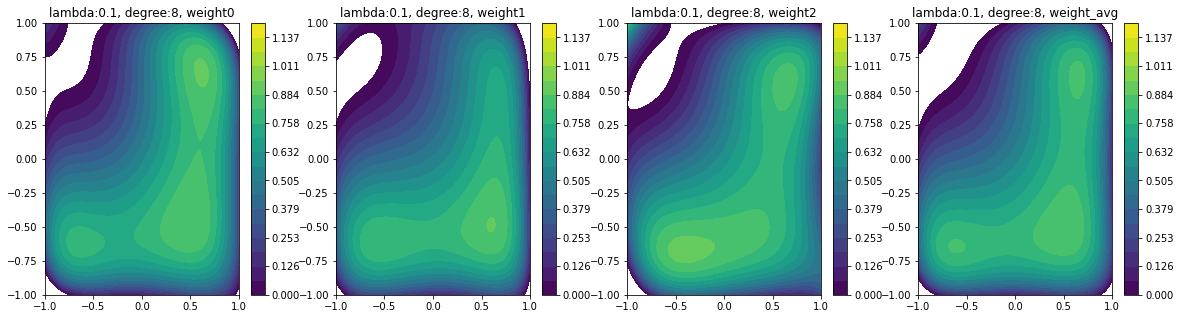

Degree= 8 lambda= 0.1
Bias = 0.09885635611372832
Variance = 0.007385457613070855
MSE = 0.01715803675715513


<Figure size 432x288 with 0 Axes>

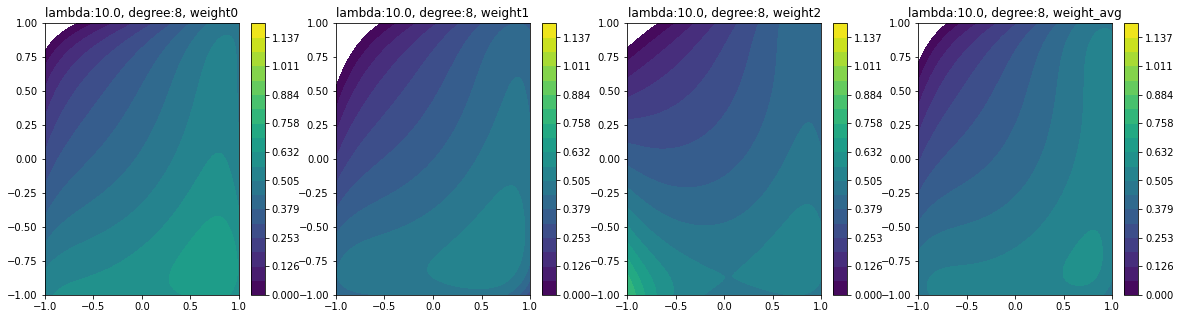

Degree= 8 lambda= 10.0
Bias = 0.238882707667554
Variance = 0.0026036908630876964
MSE = 0.05966863888566977


<Figure size 432x288 with 0 Axes>

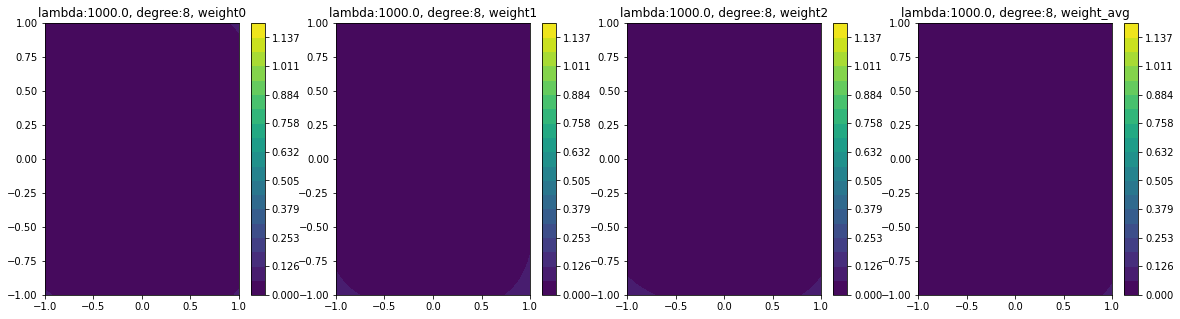

Degree= 8 lambda= 1000.0
Bias = 0.5495173280025143
Variance = 1.4310390923492198e-05
MSE = 0.30198360416594633


<Figure size 432x288 with 0 Axes>

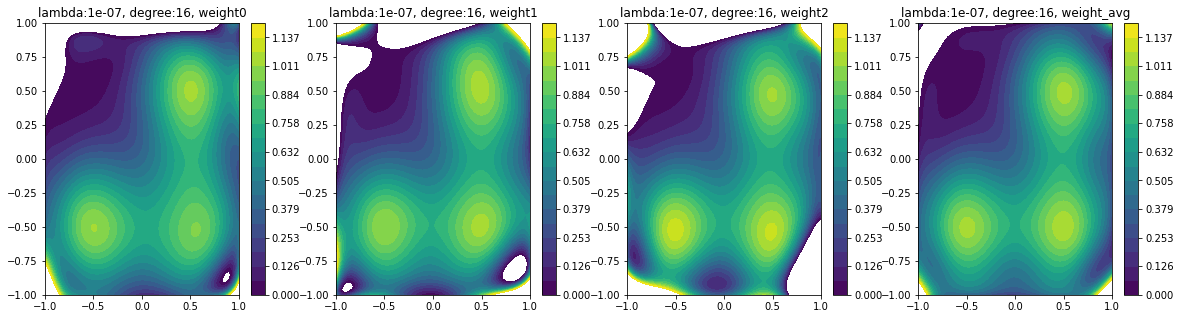

Degree= 16 lambda= 1e-07
Bias = 0.14758242727375043
Variance = 0.4145323485482154
MSE = 0.43631292138822725


<Figure size 432x288 with 0 Axes>

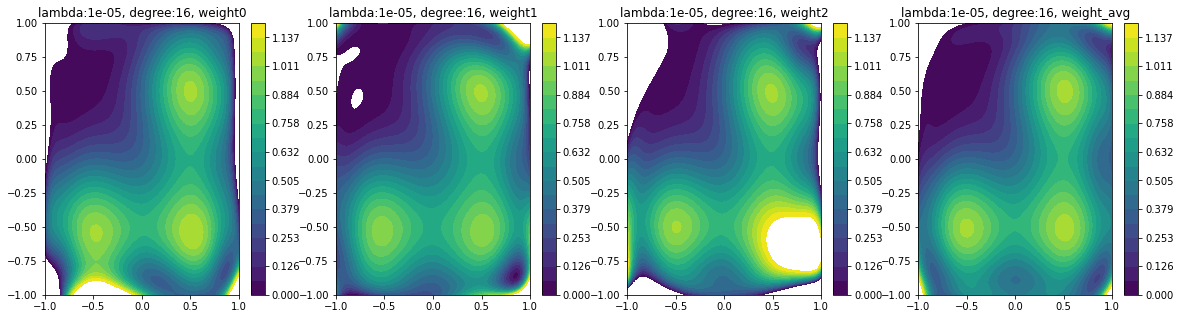

Degree= 16 lambda= 1e-05
Bias = 0.1339204435513691
Variance = 0.15023089303827447
MSE = 0.16816557823926992


<Figure size 432x288 with 0 Axes>

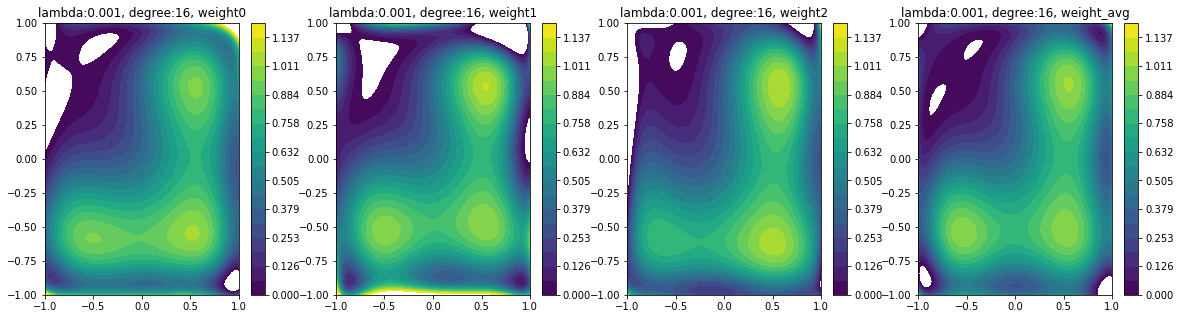

Degree= 16 lambda= 0.001
Bias = 0.0737015176206368
Variance = 0.05756868381633376
MSE = 0.0630005975159188


<Figure size 432x288 with 0 Axes>

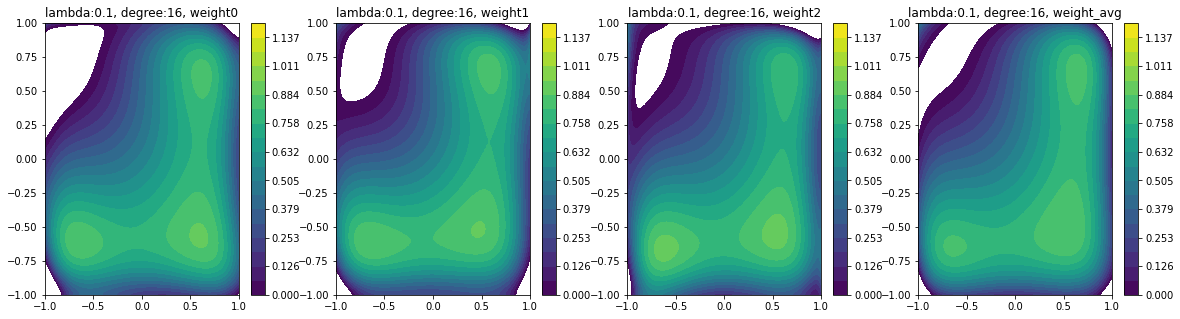

Degree= 16 lambda= 0.1
Bias = 0.10495051140173775
Variance = 0.010974289509763977
MSE = 0.02198889935325026


<Figure size 432x288 with 0 Axes>

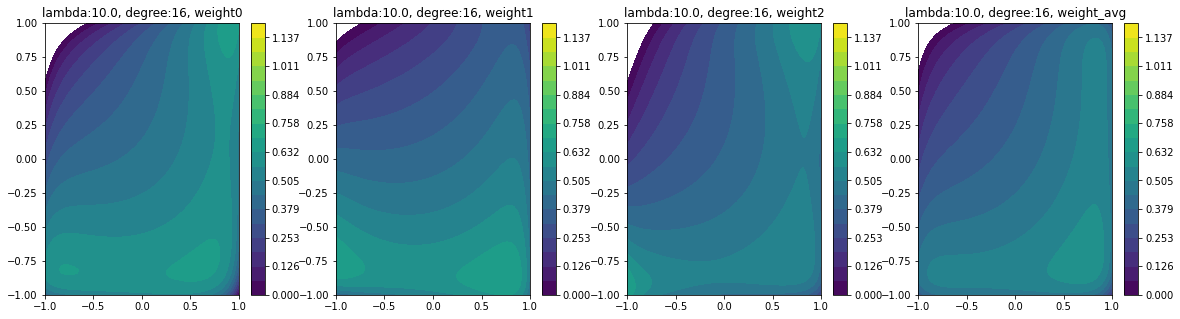

Degree= 16 lambda= 10.0
Bias = 0.2321017167970665
Variance = 0.002246915180878491
MSE = 0.05611812212102415


<Figure size 432x288 with 0 Axes>

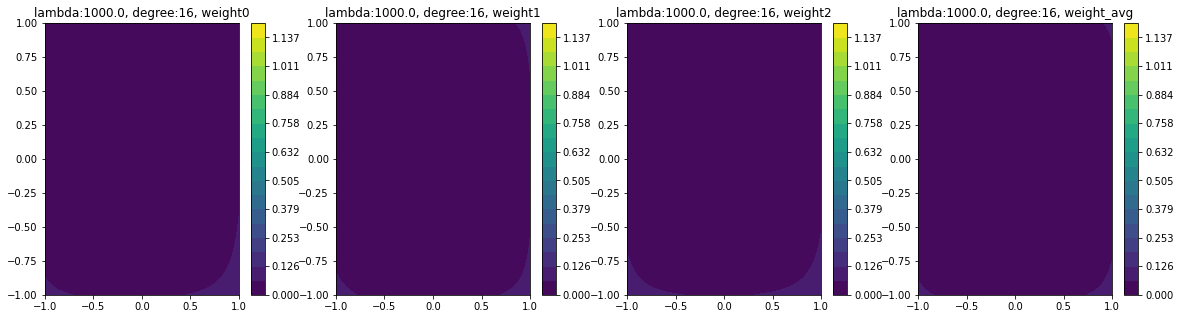

Degree= 16 lambda= 1000.0
Bias = 0.5490311667222187
Variance = 1.89568470359663e-05
MSE = 0.3014541788793967


In [8]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    n, d = X_test.shape   # assume d=2 here
    X_poly = []
    x1, x2 = X_test[:,0], X_test[:,1]
    assert(x1.shape==x2.shape==(n,))
    x1_powers = [x1**i for i in range(degree+1)]
    x2_powers = [x2**i for i in range(degree+1)]
    for i in range(1, degree+2):
        x1_, x2_ = np.array(x1_powers[:i]), np.array(x2_powers[:i])
        x2_ = np.flip(x2_, axis=0)
        assert(x1_.shape==x2_.shape==(i,n))
        product = np.multiply(x1_, x2_)
        X_poly.append(product)
    X_poly = np.concatenate(X_poly, axis=0).T
    d_dash = (degree**2 + 3*degree + 2)*0.5
    assert(X_poly.shape==(n,d_dash))
    Y_pred = X_poly@wt_vector
    return Y_pred
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    x1, x2 = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    Y_pred = polynomial_regression_ridge_pred(np.c_[x1_grid.ravel(), x2_grid.ravel()], wt_vector, degree) 
    Y_pred_grid = Y_pred.reshape(x1_grid.shape)
    
    plt.contourf(x1_grid,x2_grid,Y_pred_grid,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    n, d = X_train.shape  # assume d=2 here
    X_poly = []
    x1, x2 = X_train[:,0], X_train[:,1]
    assert(x1.shape==x2.shape==(n,))
    x1_powers = [x1**i for i in range(degree+1)]
    x2_powers = [x2**i for i in range(degree+1)]
    for i in range(1, degree+2):
        x1_, x2_ = np.array(x1_powers[:i]), np.flip(np.array(x2_powers[:i]),axis=0)
        assert(x1_.shape==x2_.shape==(i,n))
        product = np.multiply(x1_, x2_)
        X_poly.append(product)
    X_poly = np.concatenate(X_poly, axis=0).T
    d_dash = (degree**2 + 3*degree + 2)*0.5
    assert(X_poly.shape==(n,d_dash))
    
    # it will always be invertible
    wt_vector = np.linalg.inv(X_poly.T @ X_poly + 
                              reg_param * np.eye(X_poly.shape[1])) @ X_poly.T @ Y_train
    return wt_vector

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):    
    x1, x2 = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    X = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    a, b, c = np.array([0.5, 0.5]), np.array([-0.5, -0.5]), np.array([0.5, -0.5])
    
    Y = (np.exp(-4*np.square(np.linalg.norm(X-a,axis=1))) + 
         np.exp(-4*np.square(np.linalg.norm(X-b,axis=1))) + 
         np.exp(-4*np.square(np.linalg.norm(X-c, axis=1))))
    weight_list = []
    pred_list = []
    for _ in range(100):
        index_train = np.random.choice(X.shape[0], size=num_training_samples, replace=False)
        X_train, Y_train = X[index_train, :], Y[index_train]
        weight = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        weight_list.append(weight)
        pred_list.append(polynomial_regression_ridge_pred(X, weight, degree=degree))
    weight_avg = np.array(weight_list).mean(axis=0)
    index_weight = np.random.choice(len(weight_list), size=3, replace=False)
    fig = plt.figure(figsize=(20,5))
    for i in range(3):
        fig.add_subplot(1, 4, i+1)
        visualise_polynomial_2d(weight_list[index_weight[i]], degree=degree,
                               title = f'lambda:{reg_param}, degree:{degree}, weight{i}')
    fig.add_subplot(1, 4, 4)
    visualise_polynomial_2d(weight_avg, degree=degree,
                            title = f'lambda:{reg_param}, degree:{degree}, weight_avg')
    plt.show()
    preds = np.array(pred_list)
    pred_avg = preds.mean(axis=0)
    assert(pred_avg.shape==Y.shape)
    bias_squared = np.power(pred_avg - Y, 2).mean()
    bias = np.power(bias_squared,0.5)
    variance = np.power(preds - pred_avg, 2).mean(axis=0).mean()
    risk_regularized = (0.5*bias_squared) + ((reg_param/2)*np.square(np.linalg.norm(weight_avg)))
    mse_error = bias_squared+variance
    return bias, variance, mse_error

param_list = []
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50)
        param_list.append((b,v,e))
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

In [9]:
# Cell type: convenience
# for getting the bias variance matrix

def function(X):
    a, b, c = np.array([0.5, 0.5]), np.array([-0.5, -0.5]), np.array([0.5, -0.5])
    Y = (np.exp(-4*np.square(np.linalg.norm(X-a,axis=1))) + 
         np.exp(-4*np.square(np.linalg.norm(X-b,axis=1))) + 
         np.exp(-4*np.square(np.linalg.norm(X-c, axis=1))))
    return Y

# checking the contour plot of original function - done
# x1, x2 = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
# x1_grid, x2_grid = np.meshgrid(x1, x2)
# Y = function(np.c_[x1_grid.ravel(), x2_grid.ravel()]) 
# Y_grid = Y.reshape(x1_grid.shape)
# fig = plt.figure(figsize=(15,5))
# fig.add_subplot(1,3,1)
# plt.contourf(x1_grid,x2_grid,Y_grid,levels=np.linspace(0.,1.2 , 20))
# plt.title('Original function')
# plt.colorbar()
# plt.show()

# get the graph for bias variance
# print(len(param_list))
# b,v,e = zip(*param_list)
# plot = plt.plot(np.arange(1,31,1),param_list)
# plt.xticks(np.arange(0,31,6))
# plt.grid()
# plt.legend(plot, ('bias', 'variance', 'error'))
# plt.show()

# for generating tables
# import pandas as pd
# b,v,e = zip(*param_list)
# b_table = pd.DataFrame(np.array(b).reshape(5,6))
# b_table.columns = ['1e-7', '1e-5', '1e-3', '1e-1', '1e1', '1e3']
# b_table['degree'] = [1,2,4,8,16]
# b_table = b_table.set_index('degree')
# print(b_table)
# print()
# v_table = pd.DataFrame(np.array(v).reshape(5,6))
# v_table.columns = ['1e-7', '1e-5', '1e-3', '1e-1', '1e1', '1e3']
# v_table['degree'] = [1,2,4,8,16]
# v_table = v_table.set_index('degree')
# print(v_table)
# print()
# e_table = pd.DataFrame(np.array(e).reshape(5,6))
# e_table.columns = ['1e-7', '1e-5', '1e-3', '1e-1', '1e1', '1e3']
# e_table['degree'] = [1,2,4,8,16]
# e_table = e_table.set_index('degree')
# print(e_table)
# print()

** Cell type: TextWrite **

The plots of bias, variance and mse_errors are given below. Each block shows for degrees=[1,2,4,8,16] in that order and each block the points are for reg_param=[1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3] in that order. 
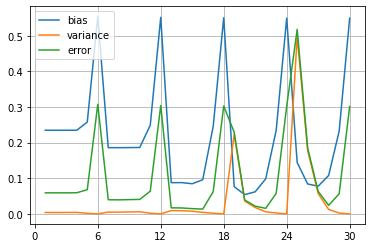
* We can see a common trend of bias increasing and variance decreasing as regularization parameter increases.  
* Also there is an increase in variance as the degree increases. Bias decreases while moving from degrees 1 to 8 but again increases a little in degree 16. This shows a degree of 8 is sufficient in order to represent this function and further increase in degrees won't help much. 

### Bias table
| reg_param | 1e-7     | 1e-5     | 1e-3     | 1e-1     | 1e1      | 1e3      |
|-----------|----------|----------|----------|----------|----------|----------|
| degree    |          |          |          |          |          |          |
| 1         | 0.234761 | 0.234759 | 0.234722 | 0.234739 | 0.257636 | 0.554566 |
| 2         | 0.185929 | 0.185807 | 0.186049 | 0.186403 | 0.248690 | 0.551512 |
| 4         | 0.087635 | 0.087846 | 0.084619 | 0.095853 | 0.245879 | 0.550280 |
| 8         | 0.076329 |**0.054125**| 0.062094 | 0.098328 | 0.234392 | 0.549370 |
| 16        | 0.144069 | 0.084023 | 0.077752 | 0.107918 | 0.232081 | 0.549062 |

* Minimum bias --> degree=8 and reg_param=1e-3
* Bias increase as reg_param increases.
* Bias decrease as degree increases.

### Variance Table
| reg_param | 1e-7     | 1e-5     | 1e-3     | 1e-1     | 1e1      | 1e3      |
|-----------|----------|----------|----------|----------|----------|----------|
| degree    |          |          |          |          |          |          |
| 1         | 0.004036 | 0.004017 | 0.004051 | 0.004266 | 0.001645 | **0.000006** |
| 2         | 0.005169 | 0.004955 | 0.005522 | 0.005938 | 0.001947 | 0.000008 |
| 4         | 0.009362 | 0.009017 | 0.007605 | 0.004301 | 0.002010 | 0.000010 |
| 8         | 0.223325 | 0.036077 | 0.017852 | 0.005937 | 0.002612 | 0.000015 |
| 16        | 0.496886 | 0.177665 | 0.057063 | 0.012508 | 0.002460 | 0.000017 |

* Minimum variance --> degree=1 and reg_param=1e3
* Variance decrease as reg_param increases.
* Variance increase as degree increases.

### MSE Error table
| reg_param | 1e-7     | 1e-5     | 1e-3     | 1e-1     | 1e1      | 1e3      |
|-----------|----------|----------|----------|----------|----------|----------|
| degree    |          |          |          |          |          |          |
| 1         | 0.059148 | 0.059128 | 0.059146 | 0.059368 | 0.068021 | 0.307550 |
| 2         | 0.039739 | 0.039479 | 0.040136 | 0.040684 | 0.063793 | 0.304173 |
| 4         | 0.017042 | 0.016734 | 0.014765 |**0.013489**| 0.062467 | 0.302818 |
| 8         | 0.229151 | 0.039006 | 0.021708 | 0.015606 | 0.057551 | 0.301823 |
| 16        | 0.517641 | 0.184725 | 0.063109 | 0.024154 | 0.056321 | 0.301486 |

* Minimum error for **degree=4 and reg_param=1e-1**. This is the point where not much bias variane trade-off takes place and so can be taken as the best hyper parameter for our model. 

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




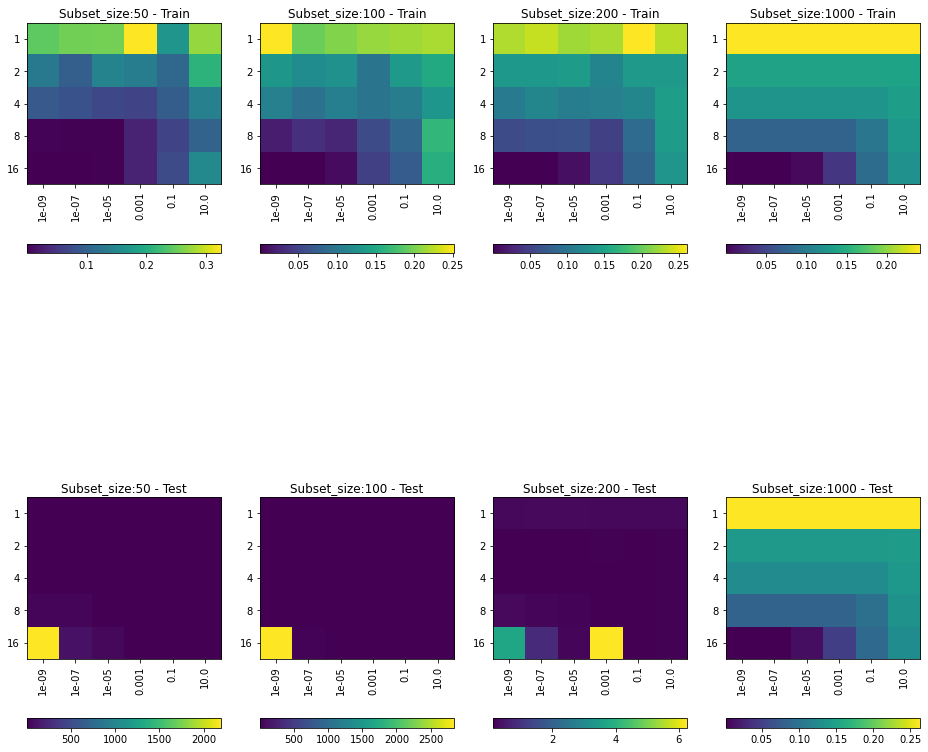

In [10]:
# Cell type : CodeWrite 

DIR = '../../Data/'
PATH = DIR+'Archive/dataset4_1.npz'
DO_PLOT = False

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    n, d = X_test.shape   # assume d=2 here
    X_poly = []
    x1, x2 = X_test[:,0], X_test[:,1]
    assert(x1.shape==x2.shape==(n,))
    x1_powers = [x1**i for i in range(degree+1)]
    x2_powers = [x2**i for i in range(degree+1)]
    for i in range(1, degree+2):
        x1_, x2_ = np.array(x1_powers[:i]), np.array(x2_powers[:i])
        x2_ = np.flip(x2_, axis=0)
        assert(x1_.shape==x2_.shape==(i,n))
        product = np.multiply(x1_, x2_)
        X_poly.append(product)
    X_poly = np.concatenate(X_poly, axis=0).T
    d_dash = (degree**2 + 3*degree + 2)*0.5
    assert(X_poly.shape==(n,d_dash))
    Y_pred = X_poly@wt_vector
    return Y_pred
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    n, d = X_train.shape  # assume d=2 here
    X_poly = []
    x1, x2 = X_train[:,0], X_train[:,1]
    assert(x1.shape==x2.shape==(n,))
    x1_powers = [x1**i for i in range(degree+1)]
    x2_powers = [x2**i for i in range(degree+1)]
    for i in range(1, degree+2):
        x1_, x2_ = np.array(x1_powers[:i]), np.flip(np.array(x2_powers[:i]),axis=0)
        assert(x1_.shape==x2_.shape==(i,n))
        product = np.multiply(x1_, x2_)
        X_poly.append(product)
    X_poly = np.concatenate(X_poly, axis=0).T
    d_dash = (degree**2 + 3*degree + 2)*0.5
    assert(X_poly.shape==(n,d_dash))
    
    wt_vector = np.linalg.inv(X_poly.T @ X_poly + 
                              reg_param * np.eye(X_poly.shape[1])) @ X_poly.T @ Y_train
    return wt_vector

def visualise_polynomial_2d_ques4(wt_vector, degree, title=""):
    # the range of y values is from -1 to 1 so countour_plot levels=np.linspace(-1.2,1.2,20)
    x1, x2 = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    Y_pred = polynomial_regression_ridge_pred(np.c_[x1_grid.ravel(), x2_grid.ravel()], wt_vector, degree) 
    Y_pred_grid = Y_pred.reshape(x1_grid.shape)
    
    plt.contourf(x1_grid,x2_grid,Y_pred_grid, levels=np.linspace(-1.2,1.2,20))
    plt.title(title)
    plt.colorbar()

def compute_BV_error_ques4(path, degree, reg_param, num_training_samples):    
    with np.load(path) as data:
        X = data['arr_0']
        Y = data['arr_1']
        X_test = data['arr_2']
        Y_test = data['arr_3']
    weight_list = []; pred_list_train=[]; pred_list_test=[];
    for _ in range(1):
        index_train = np.random.choice(X.shape[0], size=num_training_samples, replace=False)
        X_train, Y_train = X[index_train, :], Y[index_train]
        weight = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        weight_list.append(weight)
        pred_list_train.append(polynomial_regression_ridge_pred(X_train, weight, degree))
        pred_list_test.append(polynomial_regression_ridge_pred(X_test, weight, degree))
    weight_avg = np.array(weight_list).mean(axis=0)
    train_pred_avg = polynomial_regression_ridge_pred(X_train, weight_avg, degree=degree)
    test_pred_avg = polynomial_regression_ridge_pred(X_test, weight_avg, degree=degree)
    
    if DO_PLOT:
        index_weight = np.random.choice(len(weight_list), size=3, replace=False)
        fig = plt.figure(figsize=(20,5))
        for i in range(3):
            fig.add_subplot(1, 4, i+1)
            visualise_polynomial_2d_ques4(weight_list[index_weight[i]], degree=degree,
                                   title = f'lambda:{reg_param}, degree:{degree}, weight{i}')
        fig.add_subplot(1, 4, 4)
        visualise_polynomial_2d_ques4(weight_avg, degree=degree,
                                title = f'lambda:{reg_param}, degree:{degree}, weight_avg')
        plt.show()
    
    assert(test_pred_avg.shape==Y_test.shape)
    assert(train_pred_avg.shape==Y_train.shape)
    preds_train = np.array(pred_list_train)
    preds_test = np.array(pred_list_test)
    
    # no variance
    test_error = np.power(test_pred_avg - Y_test, 2).mean()
    train_error = np.power(train_pred_avg - Y_train, 2).mean()
    # with variance
    # test_error = np.power(test_pred_avg - Y_test, 2).mean()+np.power(preds_test - test_pred_avg, 2).mean(axis=0).mean()
    # train_error = np.power(train_pred_avg - Y_train, 2).mean()+np.power(preds_train - train_pred_avg, 2).mean(axis=0).mean()
    return train_error, test_error

ROWS_PLOT = 2
degree_list = [1,2,4,8,16]
reg_param_list = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
fig, axes = plt.subplots(ROWS_PLOT,4,figsize=(16,16))
for k, sub_size in enumerate([50,100,200,1000]):
    train_errors = np.ones(shape=(5,6))
    test_errors = np.ones(shape=(5,6))
    for i, degree in enumerate(degree_list):
        for j, reg_param in enumerate(reg_param_list):
            train_error, test_error = compute_BV_error_ques4(PATH, degree, reg_param, num_training_samples=sub_size)
            train_errors[i,j]=train_error
            test_errors[i,j]=test_error
    (ii, jj) = np.where(test_errors==np.amin(test_errors)) 
    (ii2, jj2) = np.where(train_errors==np.amin(train_errors))
    # print(f'Subset_size:{sub_size}, Best_degree:{degree_list[ii[0]]}, best_reg_param:{reg_param_list[jj[0]]}', end=' ')
    # print(f'Best test error:{test_errors[ii,jj]}, Corresponding train error:{train_errors[ii,jj]}')
    # print(f'Corresponding test error:{test_errors[ii2,jj2]}, Best train error:{train_errors[ii2,jj2]}')
    trte_matrix = [train_errors, test_errors, test_errors-train_errors]
    trte_names = ['Train', 'Test', 'Difference']
    for trte in range(ROWS_PLOT):
        im = axes[trte,k].imshow(trte_matrix[trte],cmap='viridis')
        axes[trte,k].set_title(f'Subset_size:{sub_size} - '+trte_names[trte])
        axes[trte,k].set_xticklabels([0]+reg_param_list,rotation=90)
        axes[trte,k].set_yticklabels([0]+degree_list)
        fig.colorbar(im, ax=axes[trte,k], orientation='horizontal')
plt.show()

** Cell type : TextWrite **

### Best degree and reg_param based on test errors
* Subset_size:50,  Best_degree:2,  best_reg_param:1e-05
* Subset_size:100, Best_degree:4,  best_reg_param:0.1
* Subset_size:200, Best_degree:8,  best_reg_param:0.001
* Subset_size:1000,Best_degree:16, best_reg_param:1e-09

### Best test error table
|             | Min test error | Corresponding train error |
|-------------|-----------------|---------------------------|
| num_samples |                 |                           |
| 50          | 0.15554523      | 0.10806043                |
| 100         | 0.14013512      | 0.11305531                |
| 200         | 0.10018379      | 0.05339178                |
| 1000        | 0.00119772      | 2.5485983e-05             |

### Best train error table
|             | Min train error | Corresponding test error |
|-------------|------------------|--------------------------|
| num_samples |                  |                          |
| 50          | 7.54701142e-09   | 453.78043401             |
| 100         | 9.22844882e-06   | 650.51490463             |
| 200         | 2.3888373e-05    | 2.10133775               |
| 1000        | 2.54858865e-05   | 0.00119772               |

### Observations
* We are able to see a clear overfitting when num_samples are 50,100,200. The difference between min train error and corresponding test error is very large compared to that with 1000 samples. 
* The best model which gave the least error on train set was performing bad on test set. Also from the contor plots the distribution of scores for train and test set is only similar when using 1000 sample in the train dataset even though the range is different. 
* Also from the contour plots of subset size 50,100,200 we can see that the train and test errors behave in complete opposite ways. Lower train error corresponds to a higher test error and vice versa. But when using 1000 samples as train dataset the train and test errors correlate very well.
* The contour plots of all training subset sizes are similar. Only the range differs. This is not true for test dataset. 
* The min train error increases with the number of samples. This is because it is much easier to fit a line of there are few points compared to that of fitting a line on many points.
* In other words the models when using 50,100,200 subset size are overfitting on the train dataset thus leading to bad predictions on test dataset. But while using 1000 sample this amount of overfitting is reduced. 
* In conclusion, more training samples helps in reducing overfitting. The higher the training samples, the better the model will be. 
* It is always better to go with a large dataset given no time constraints and data acquiring constraints.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












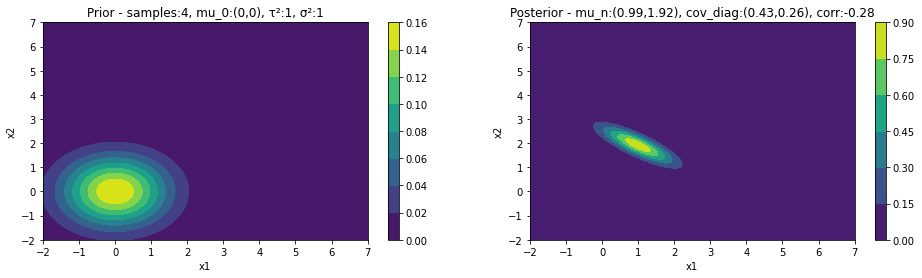

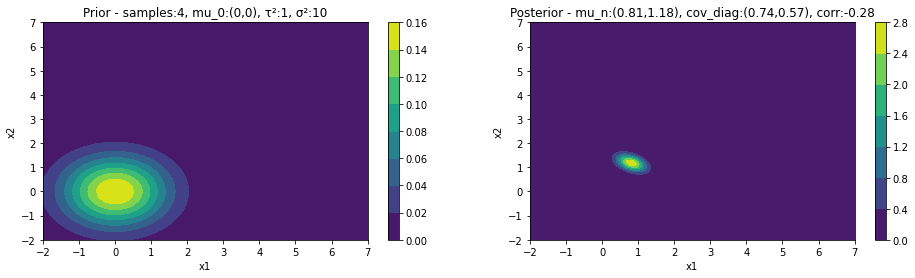

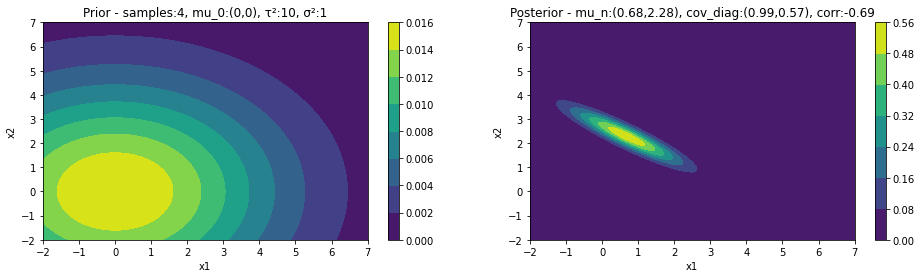

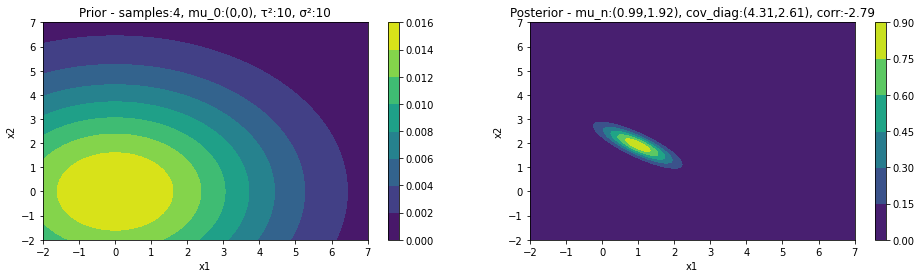

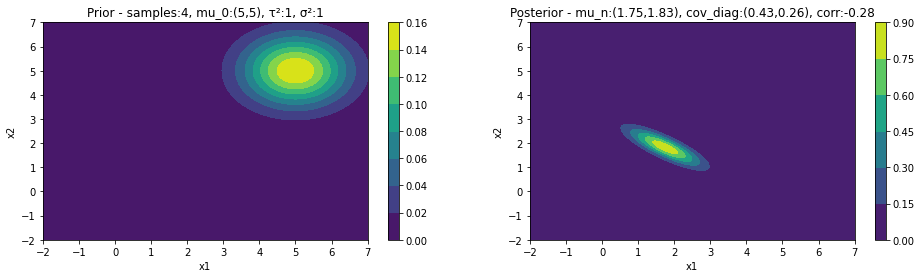

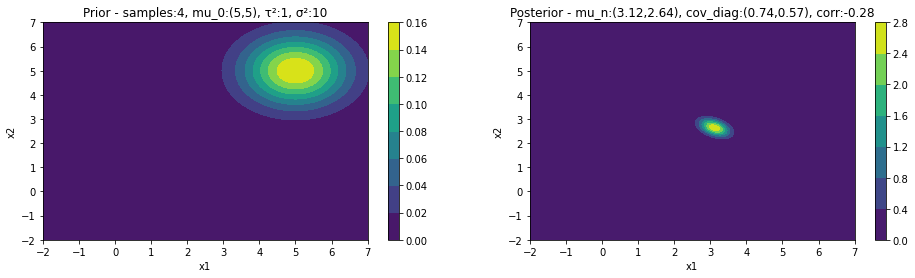

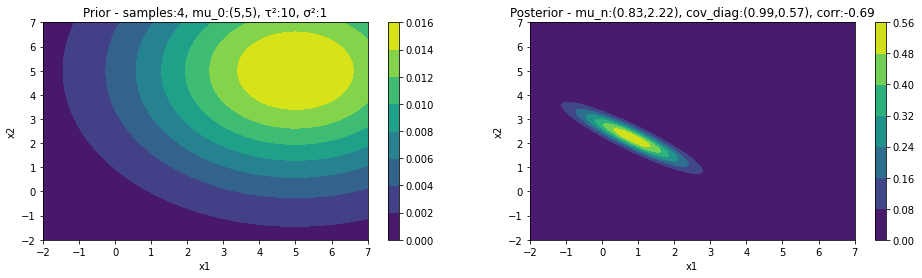

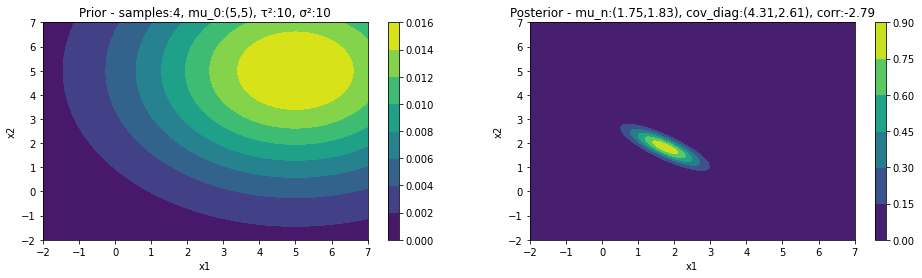

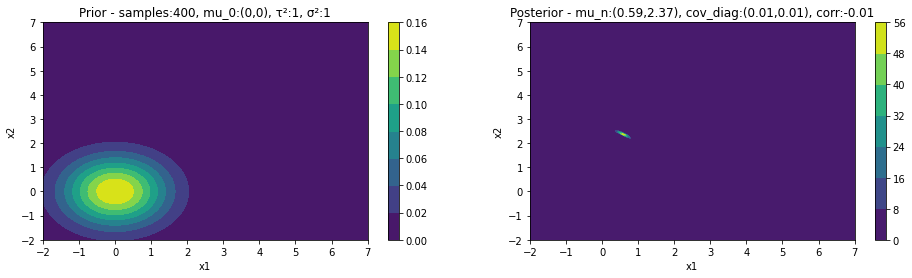

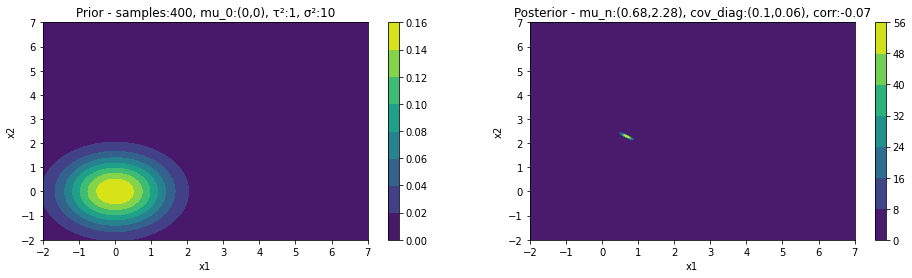

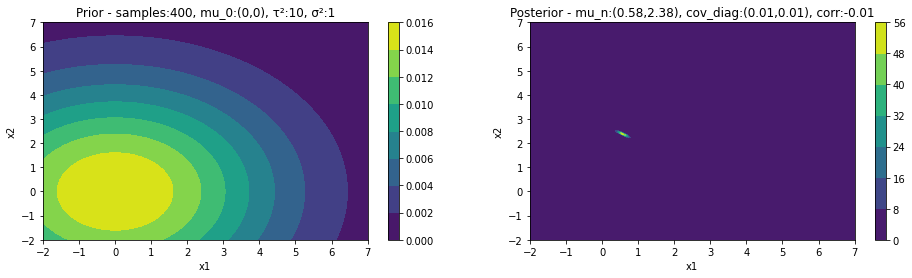

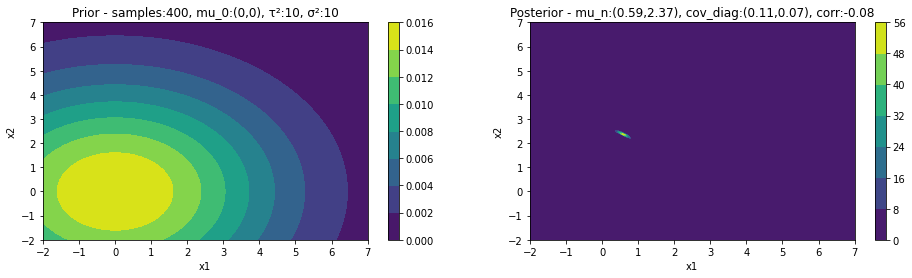

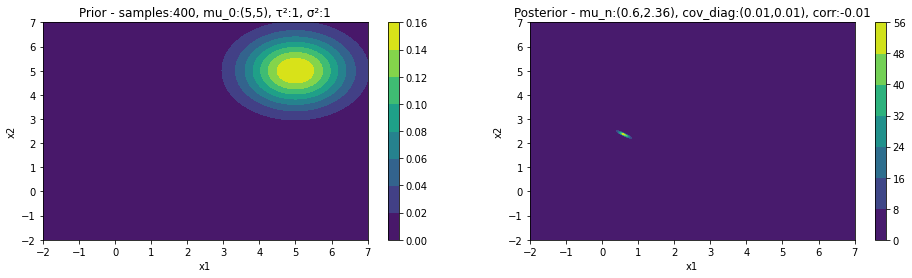

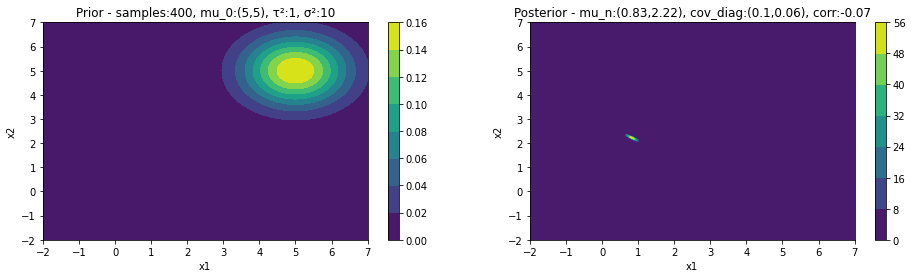

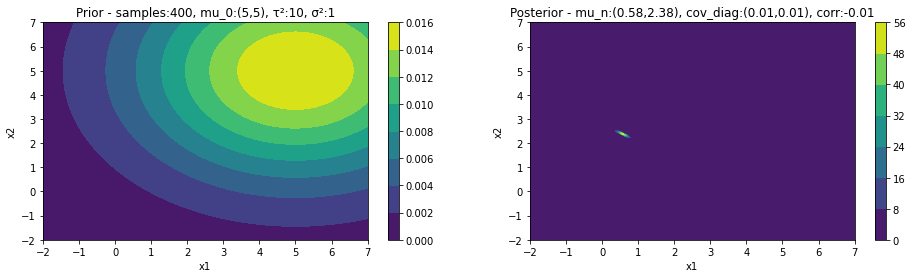

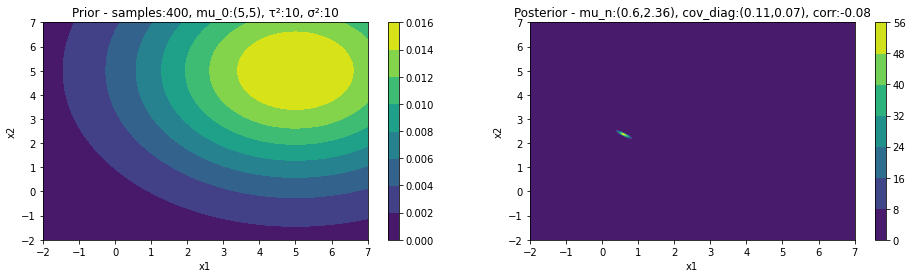

In [11]:
# Cell type : CodeWrite 

x1 = np.array([1.0,2.0,0.6,1.1])
x2 = np.array([2.0,2.1,1.5,0.9])
Y = np.array([5.1,6.1,4.2,2.9])
X = np.stack([x1,x2], axis=1)
assert(X.shape==(4,2) and Y.shape==(4,))

def multivariate_gaussian(pos, mu, cov):
    d = mu.shape[0]
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    N = np.sqrt((2*np.pi)**d * cov_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, cov_inv, pos-mu)
    return np.exp(-fac / 2) / N

def plot_contour(mean, cov, title):
    N = 1000
    x1 = np.linspace(-2, 7, N)
    x2 = np.linspace(-2, 7, N)
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    pos = np.empty(x1_grid.shape + (2,))
    pos[:, :, 0] = x1_grid
    pos[:, :, 1] = x2_grid
    Y = multivariate_gaussian(pos, mean, cov)
    assert(x1_grid.shape==x2_grid.shape==Y.shape)
    plt.contourf(x1_grid,x2_grid,Y)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.colorbar()

def prior_and_posteriror(X, Y, mu1, mu2, tau_square, sigma_square, samples):
    mu_0 = np.array([mu1, mu2])
    s_0 = tau_square*np.eye(2)
    assert(mu_0.shape==(2,) and s_0.shape==(2,2))
    beta = 1/sigma_square
    s_0_inv = np.linalg.inv(s_0)
    s_n = np.linalg.inv(s_0_inv + beta*(X.T@X))
    mu_n = s_n@((s_0_inv@mu_0) + beta*(X.T@Y))
    cov_s_n = beta*s_n
    assert(s_n.shape==(2,2) and mu_n.shape==(2,))
    fig = plt.figure(figsize=(16,4))
    fig.add_subplot(1,2,1)
    plot_contour(mean=mu_0, cov=s_0, 
                 title=(f'Prior - samples:{samples}, mu_0:({mu1},{mu2}), \N{greek small letter tau}\N{superscript two}:{tau_square}, \N{greek small letter sigma}\N{superscript two}:{sigma_square}'))
    fig.add_subplot(1,2,2)
    plot_contour(mean=mu_n, cov=cov_s_n, 
                 title=(f'Posterior - mu_n:({round(mu_n[0],2)},{round(mu_n[1],2)}), cov_diag:({round(s_n[0,0],2)},{round(s_n[1,1],2)}), corr:{round(s_n[0,1],2)}'))
    plt.show()
    return mu_n, cov_s_n

for i in [0,5]:
    for j in [1,10]:
        for k in [1,10]:
            mu_n, s_n = prior_and_posteriror(X, Y, mu1=i, mu2=i, tau_square=j, sigma_square=k, samples=4)
X_tiled = np.tile(X, reps=(100,1))
Y_tiled = np.tile(Y, reps=(100,))
assert(X_tiled.shape==(400,2) and Y_tiled.shape==(400,))
for i in [0,5]:
    for j in [1,10]:
        for k in [1,10]:
            mu_n, s_n = prior_and_posteriror(X_tiled, Y_tiled, mu1=i, mu2=i, tau_square=j, sigma_square=k, samples=400)

** Cell type : TextWrite **
### Observations
* Changing prior $\mu$ keeping $\tau^2$, $\sigma^2$ and $num samples$ constant only changes the mean of the posterior distribution. The covariance of the posterior distribution remains the same.
* Changing prior $\tau^2$ keeping $\mu$, $\sigma^2$ and $num samples$ constant changes the mean as well as the covariance of the posterior distribution. Increasing $\tau^2$ increases the diagonal elements of the covariance matrix indicating a more spread out bivariate normal distribution. This is because $\tau^2$ represents the prior info. Higher $\tau^2$ indicates less prior information is available and thus the posterior distributions would not be good as well. The negative correlation also increases as $\tau^2$ increases.
* Changing prior $\sigma^2$ keeping $\mu$, $\tau^2$ and $num samples$ constant changes the mean as well as the covariance of the matrix. Higher the $\sigma^2$ lower the diagonal elements of covariance matrix. This is because having higher $\sigma^2$ means we have the elements coming from a bigger distribution. The negative correlation also decreases as $\sigma^2$ increases.
* Having same $\sigma^2/\tau^2$ ratio gives the same covariance matrix given $num samples$ to be constant. This shows the covariance of the posterior distribution only depends on $\sigma^2/\tau^2$
* Having more samples helps to make the posterior prediction less spread out. The contour plots are very much focussed on a point as seen in the graph. This is verified by the decrease in diagonal elements of covariance matrix and decrease in negative correlation as well. Having more samples and better prior information gives better posterior distribution.

<h2><center>THANK YOU</center></h2>